<a href="https://colab.research.google.com/github/ananyaangadi/Pursuit-Of-Happiness/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url1='https://raw.githubusercontent.com/ananyaangadi/Pursuit-Of-Happiness/master/data.csv'
df=pd.read_csv(url1)

In [ ]:
# Structure of the data
df.head(10)

Unnamed: 0  Economy (GDP per Capita)  ...   Freedom Continent
0         152                  0.300706  ...  0.000000      Asia
1         140                  0.401477  ...  0.106180      Asia
2         153                  0.350000  ...  0.000000      Asia
3         144                  0.332000  ...  0.085000      Asia
4         153                  0.382270  ...  0.164300      Asia
5         152                  0.319820  ...  0.234140      Asia
6         104                  0.906653  ...  0.461946    Europe
7         111                  0.916000  ...  0.419000    Europe
8         106                  0.947000  ...  0.383000    Europe
9          94                  0.878670  ...  0.357330    Europe

[10 rows x 11 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


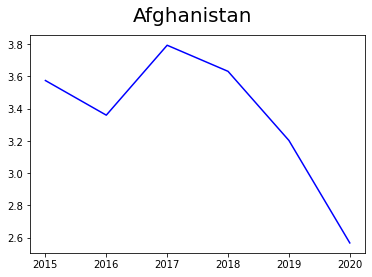

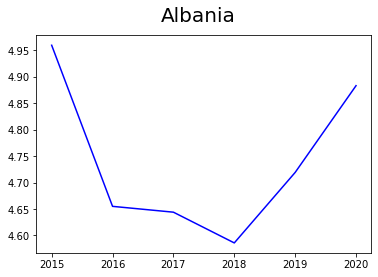

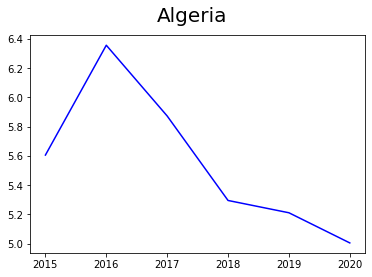

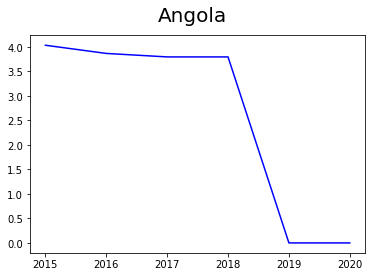

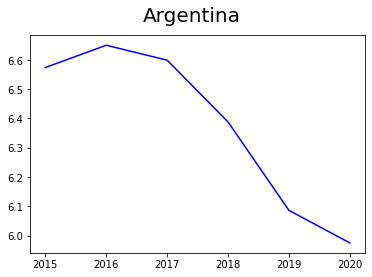

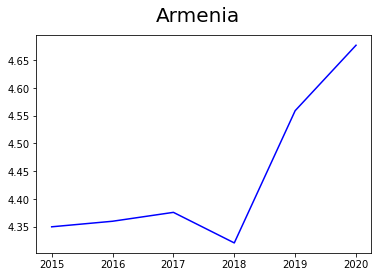

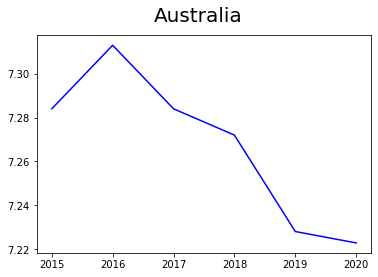

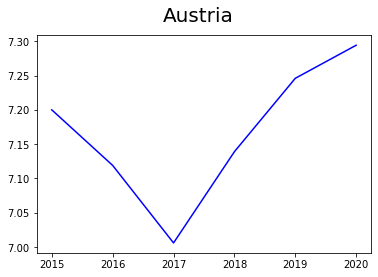

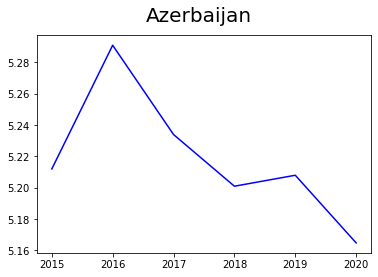

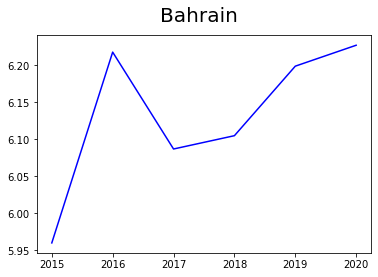

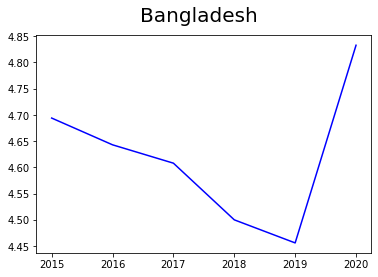

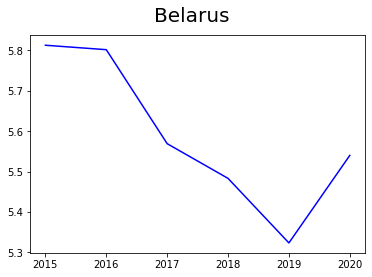

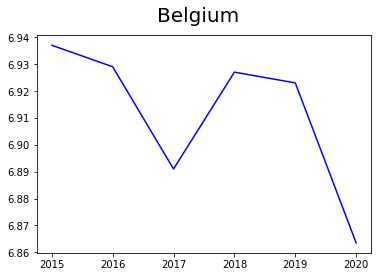

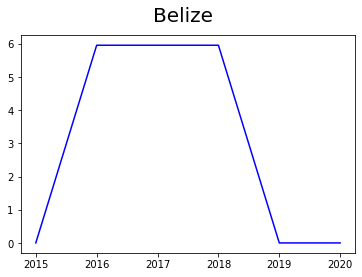

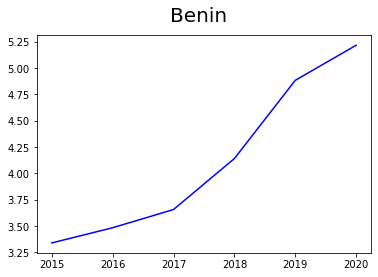

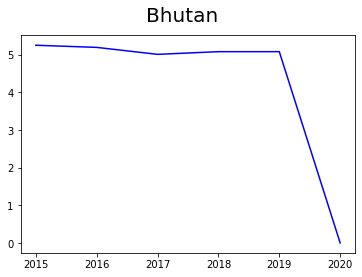

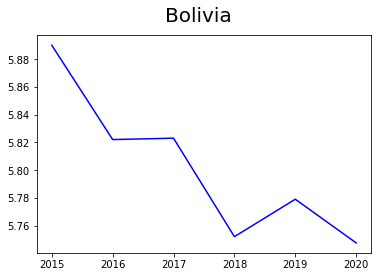

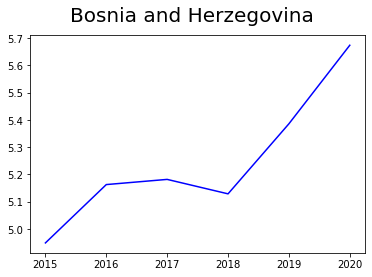

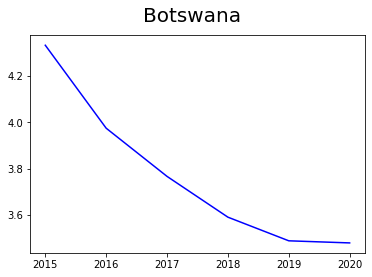

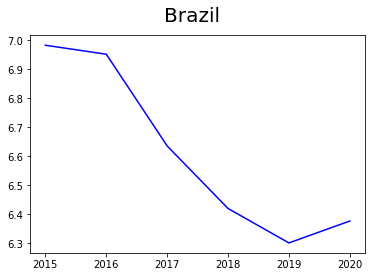

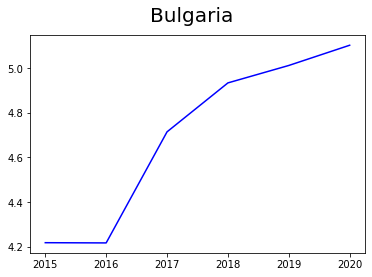

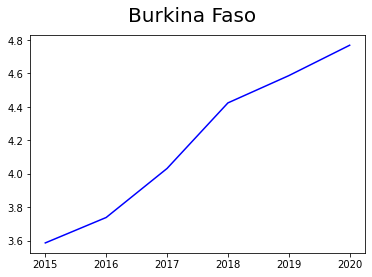

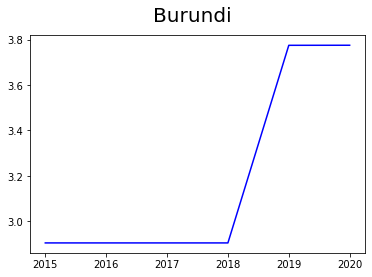

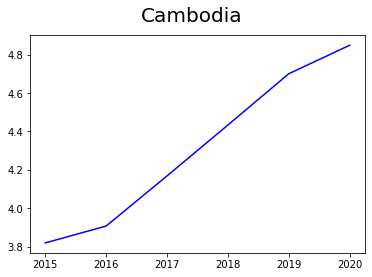

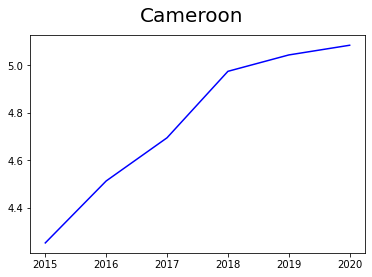

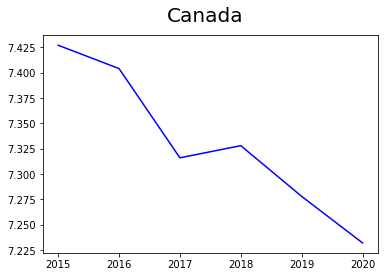

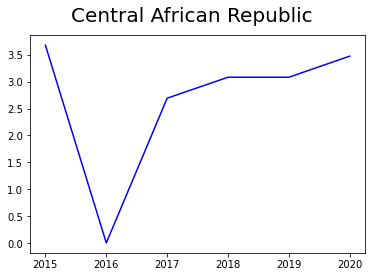

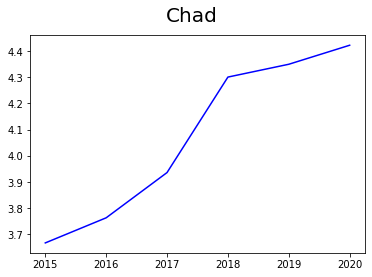

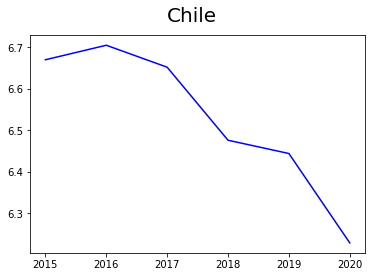

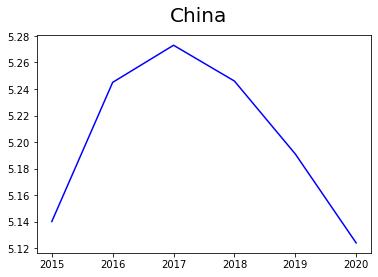

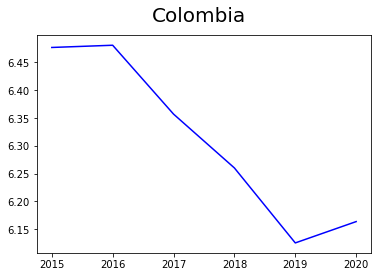

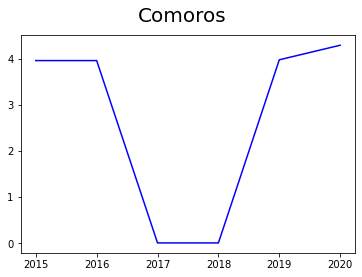

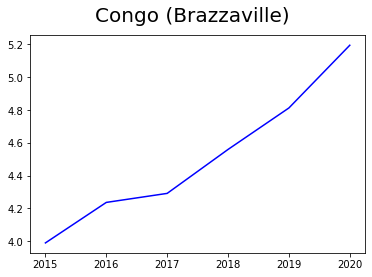

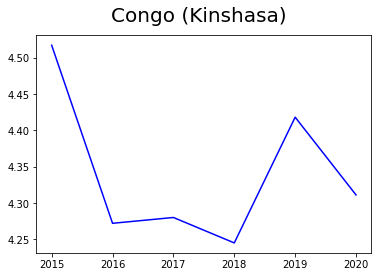

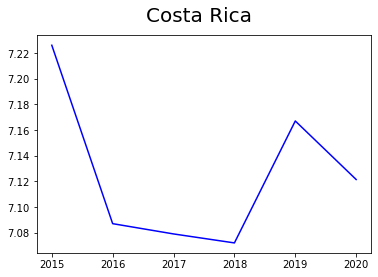

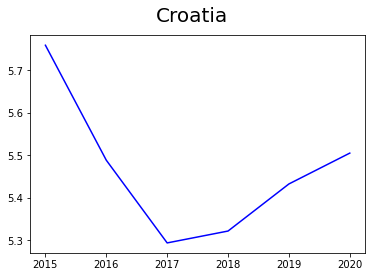

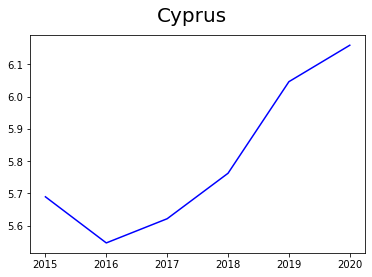

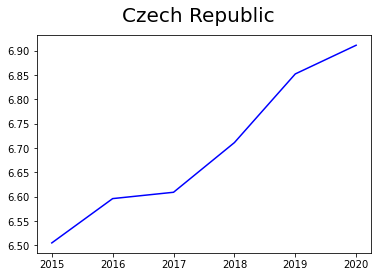

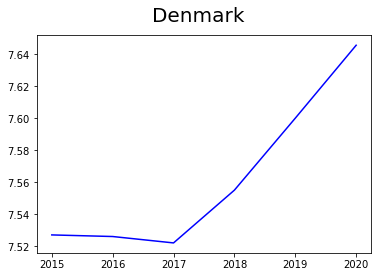

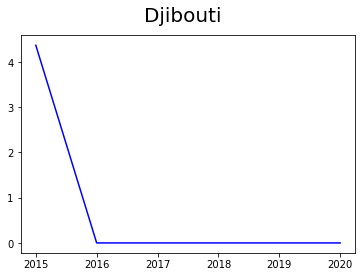

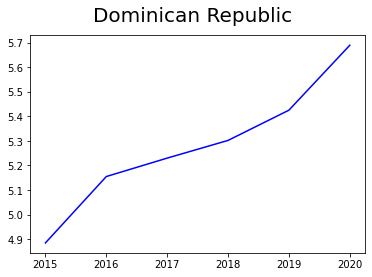

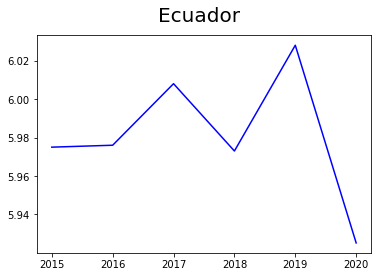

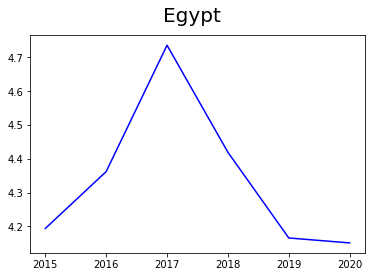

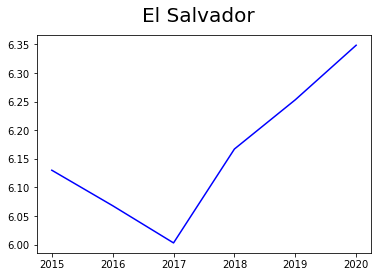

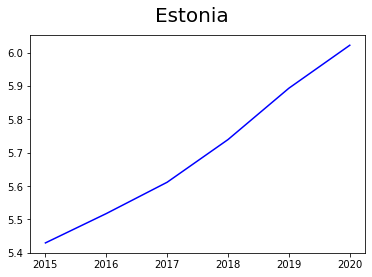

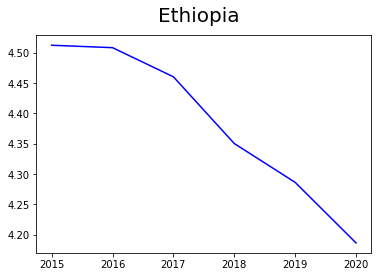

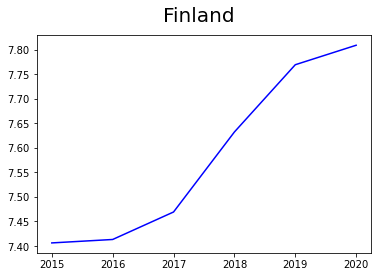

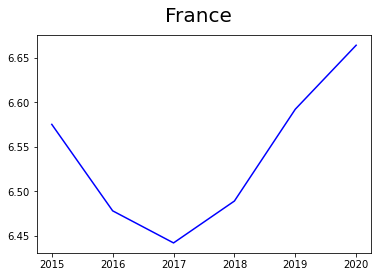

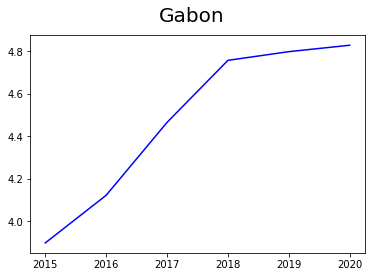

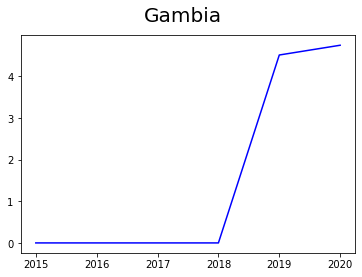

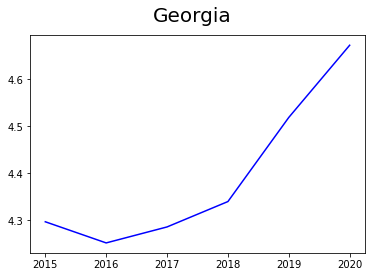

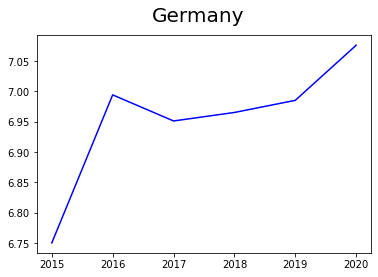

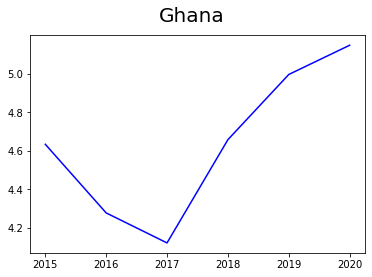

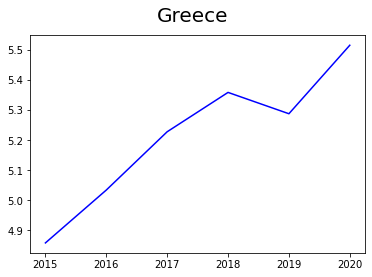

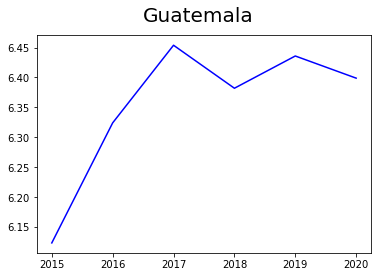

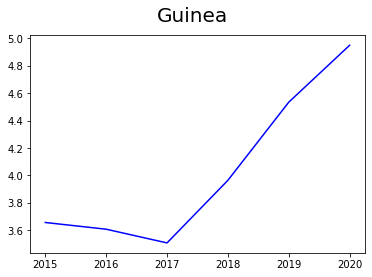

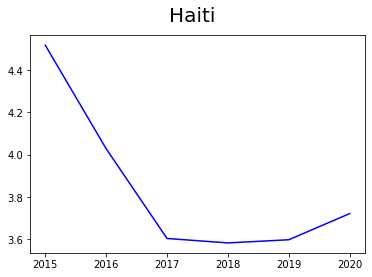

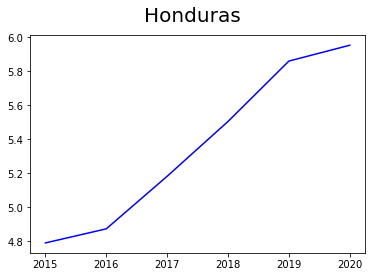

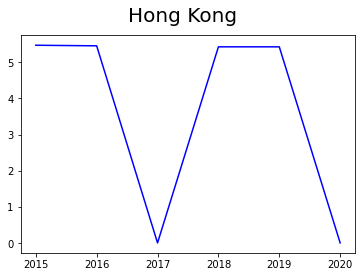

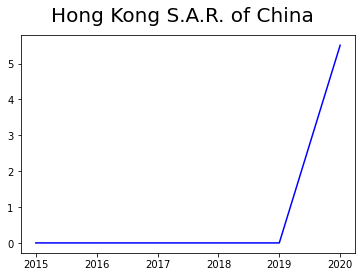

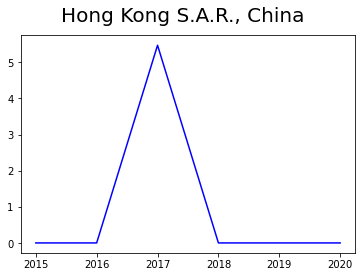

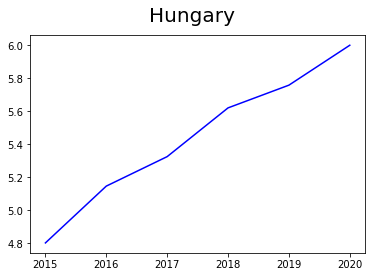

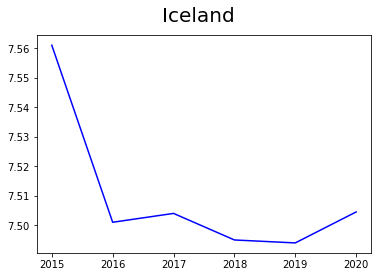

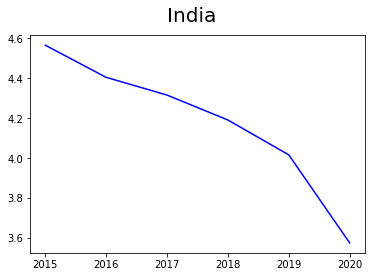

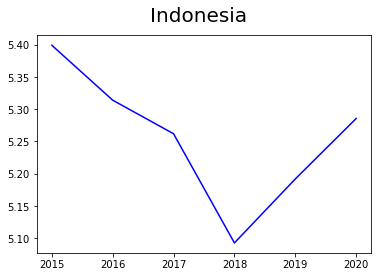

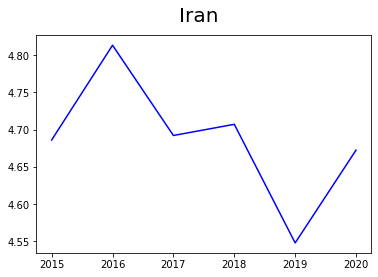

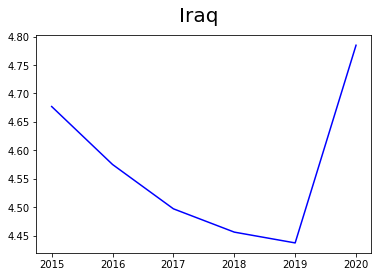

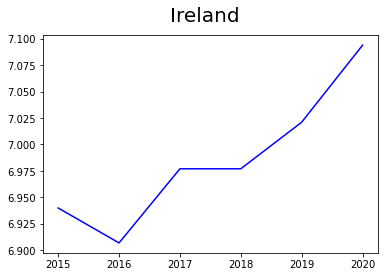

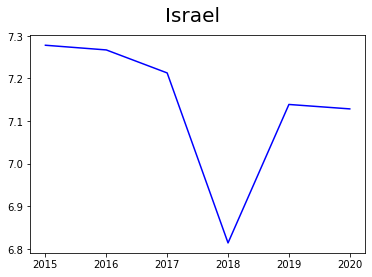

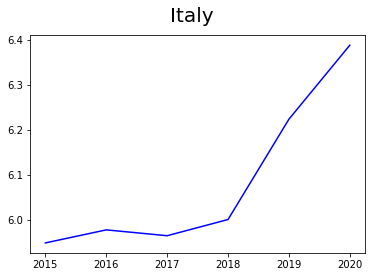

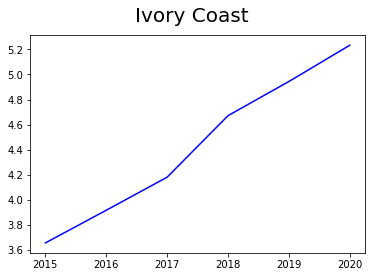

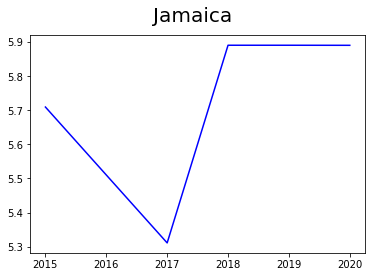

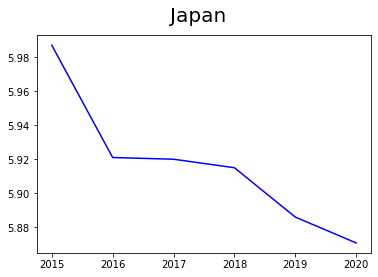

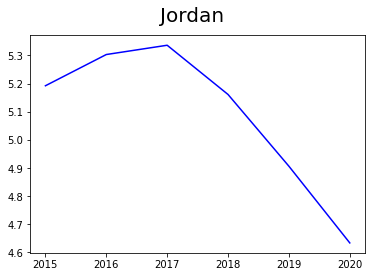

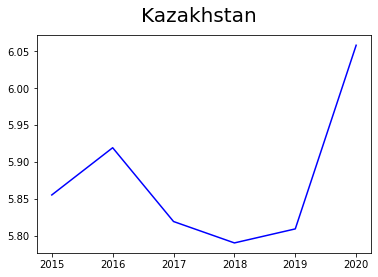

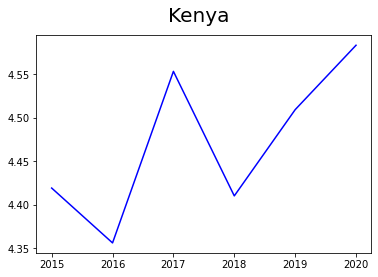

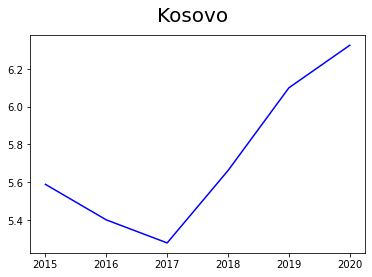

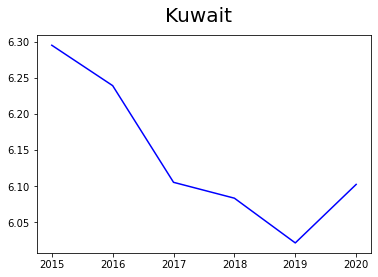

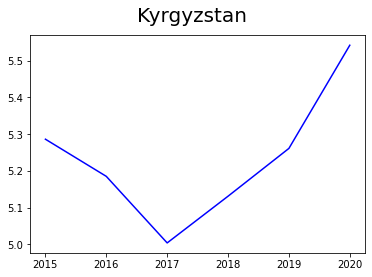

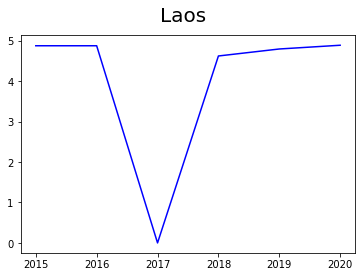

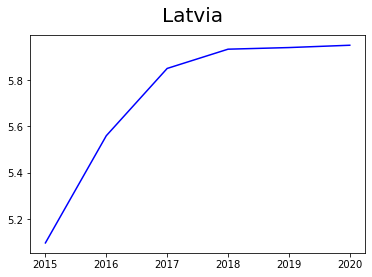

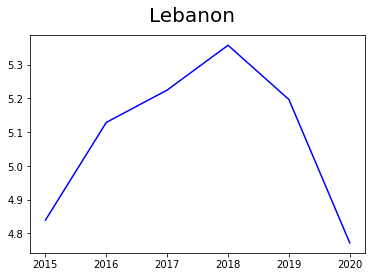

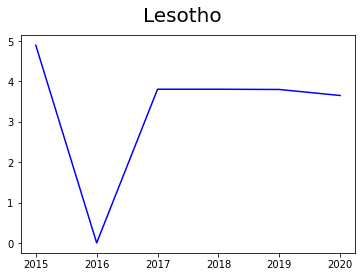

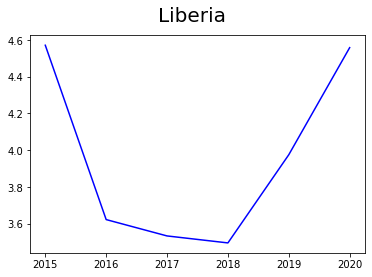

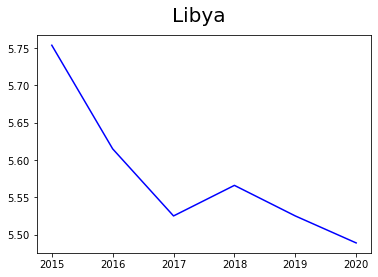

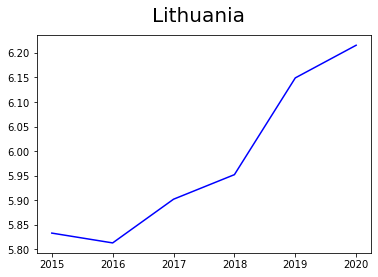

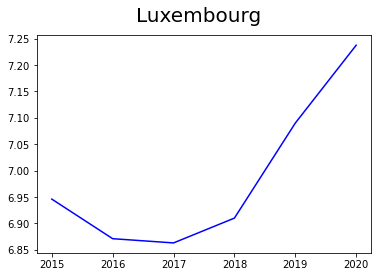

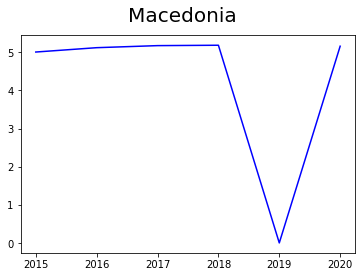

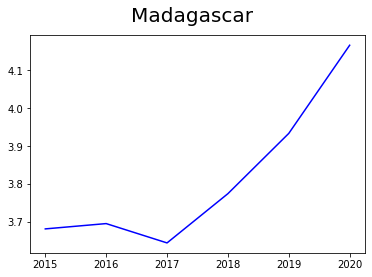

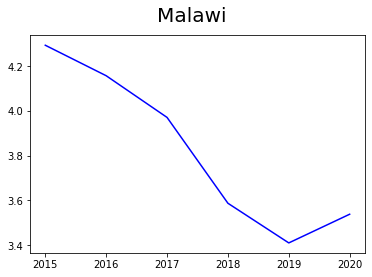

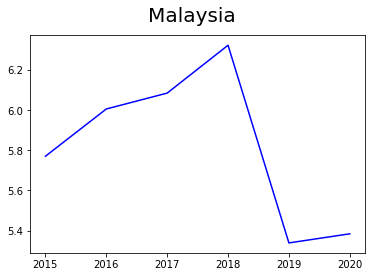

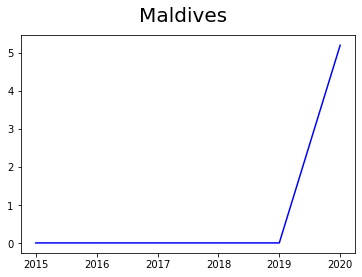

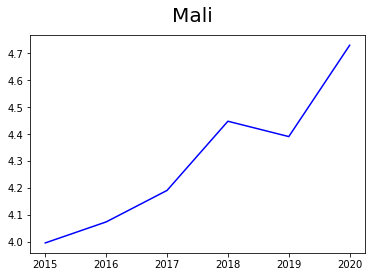

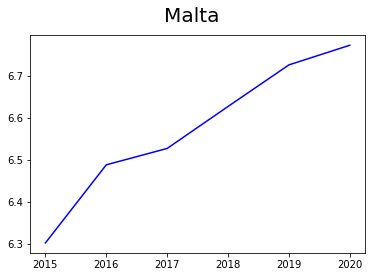

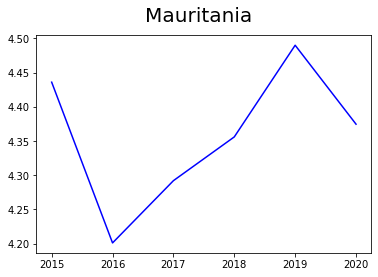

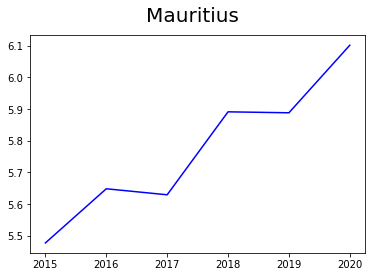

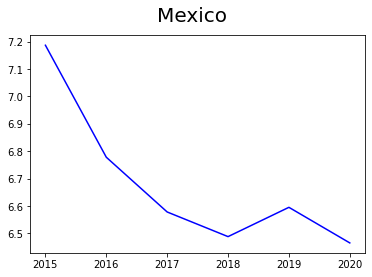

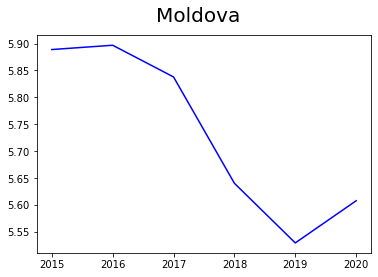

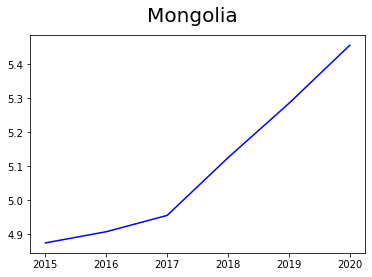

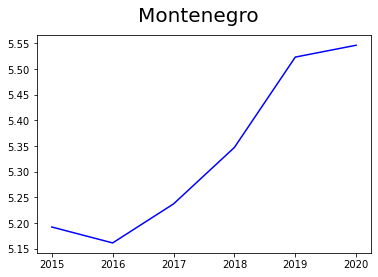

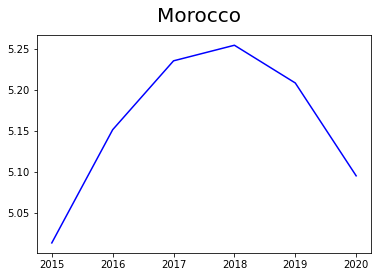

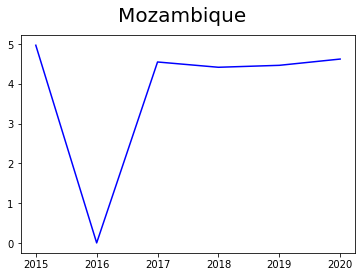

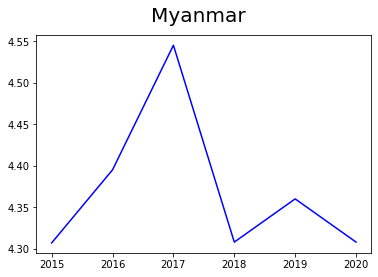

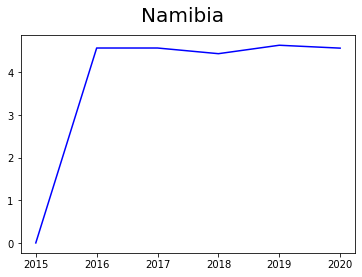

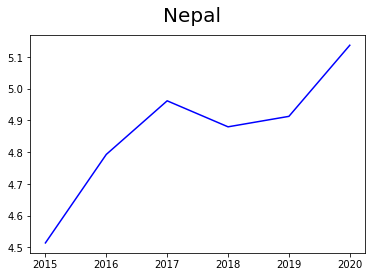

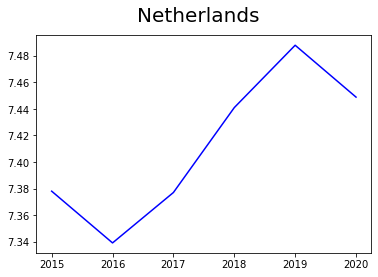

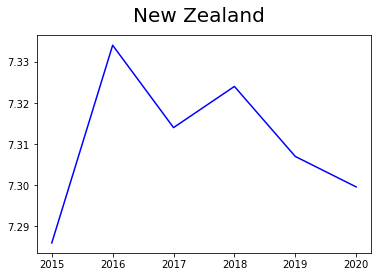

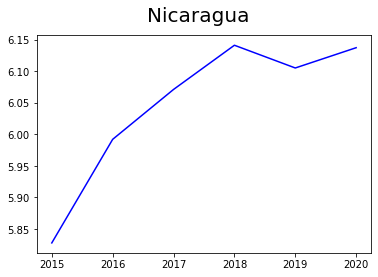

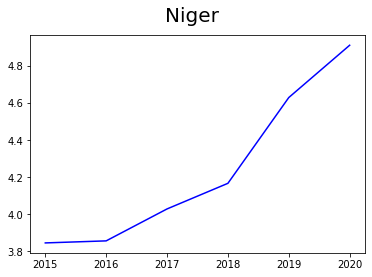

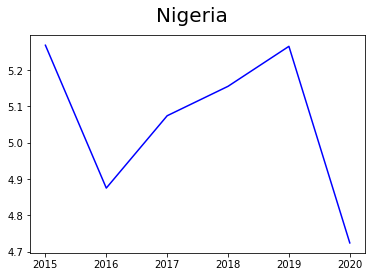

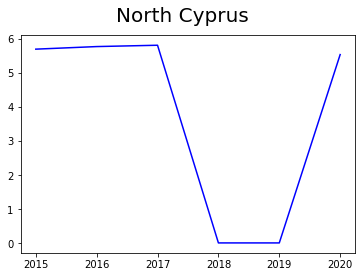

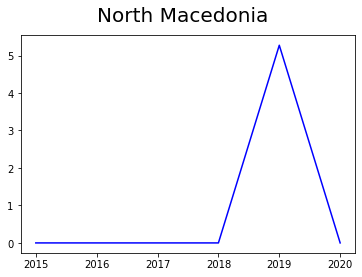

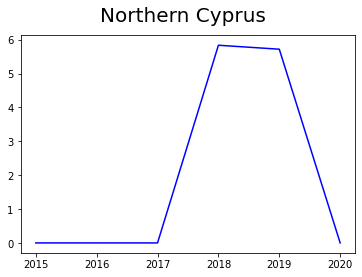

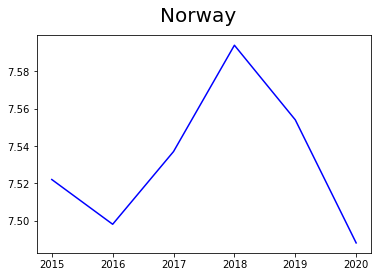

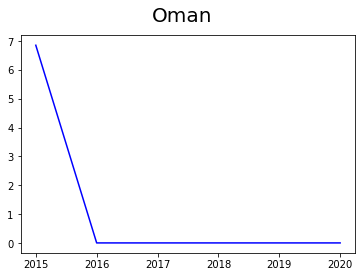

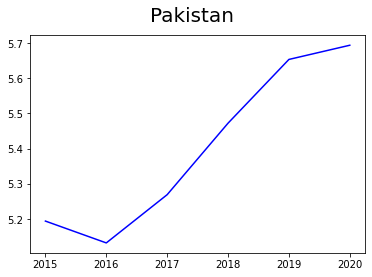

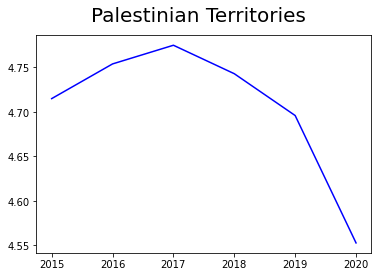

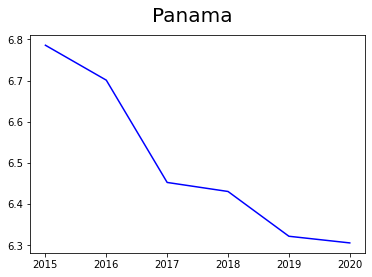

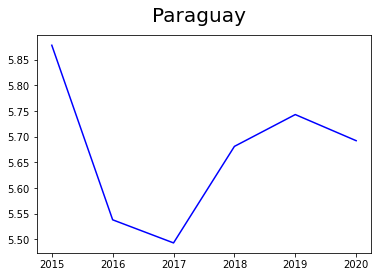

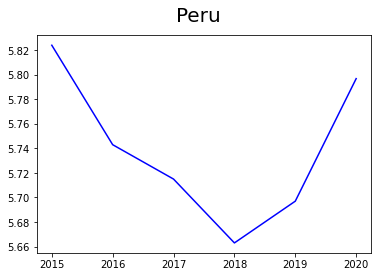

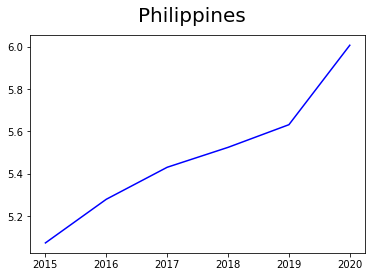

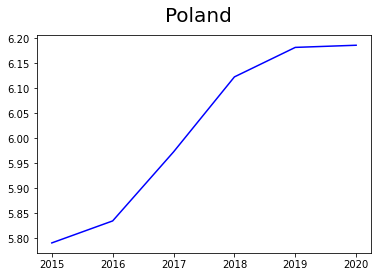

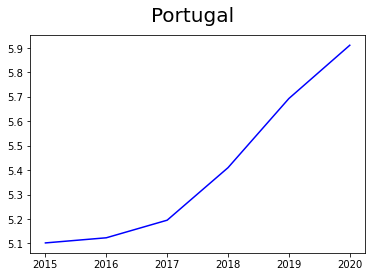

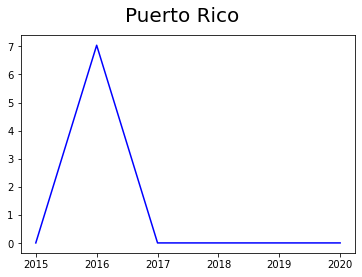

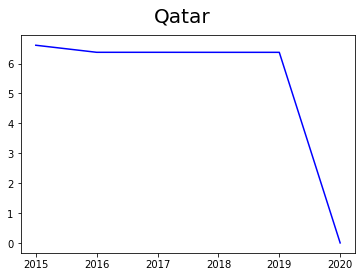

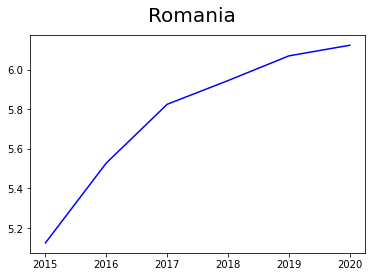

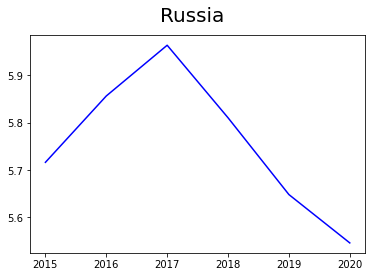

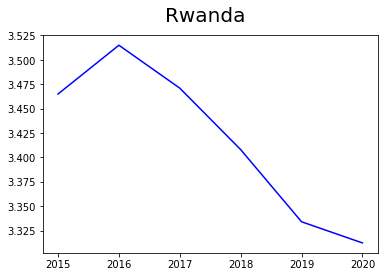

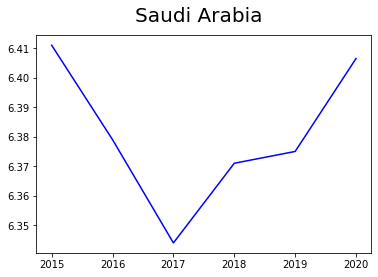

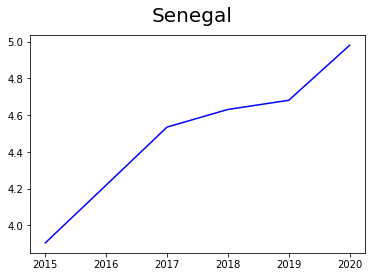

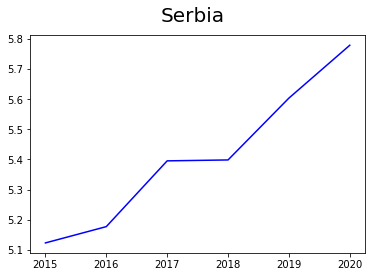

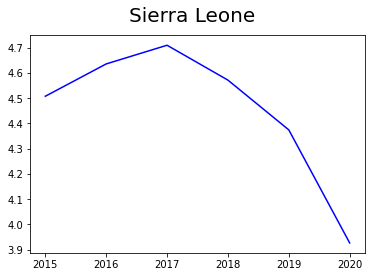

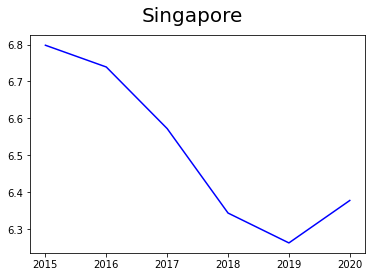

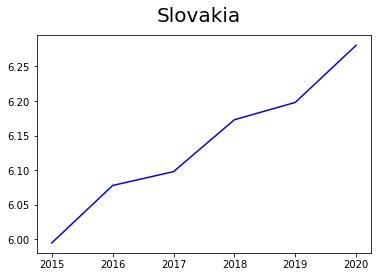

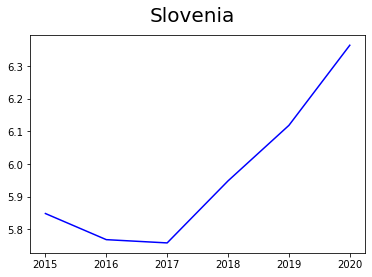

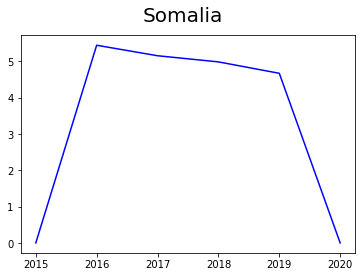

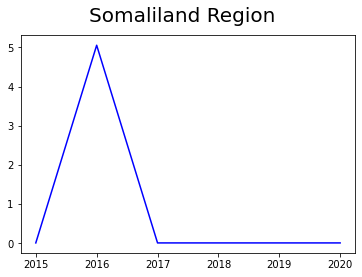

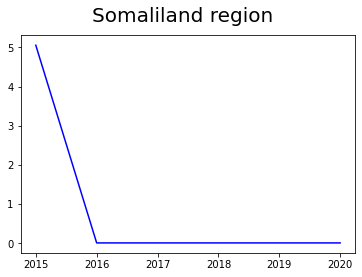

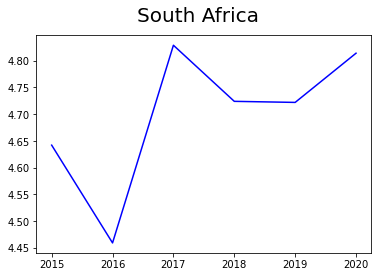

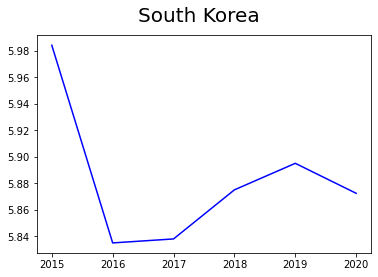

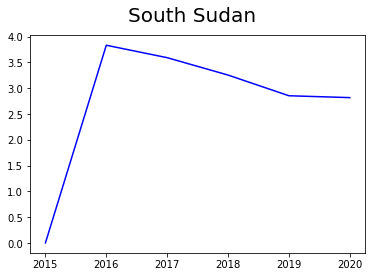

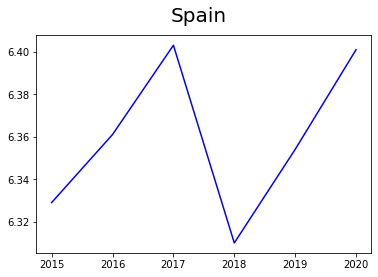

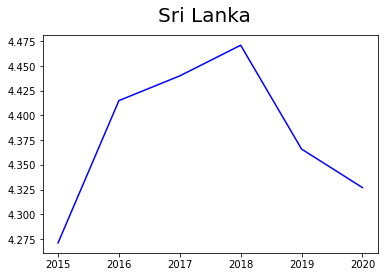

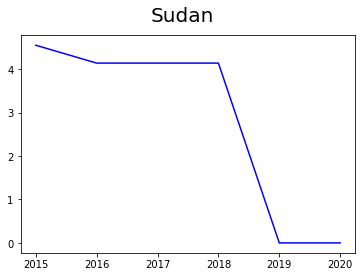

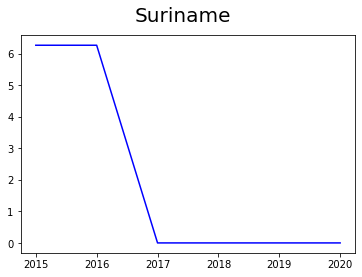

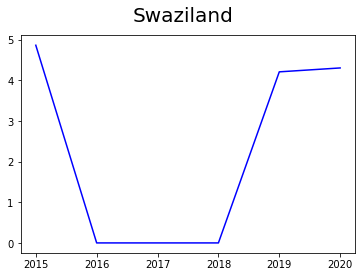

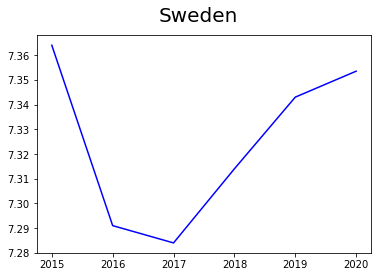

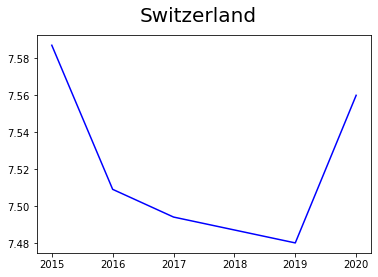

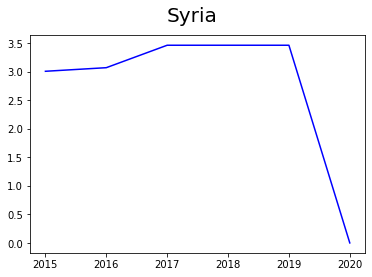

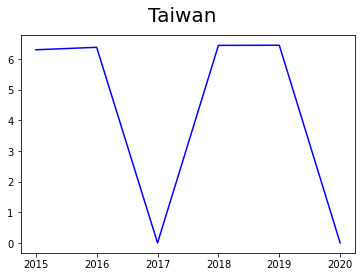

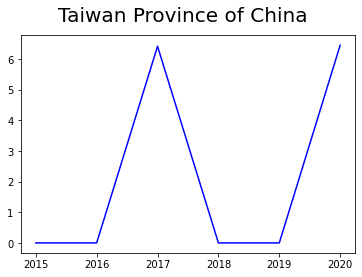

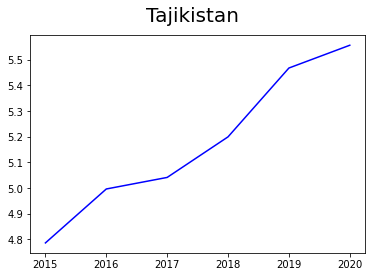

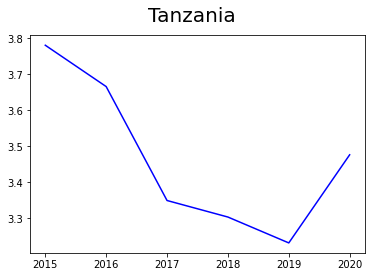

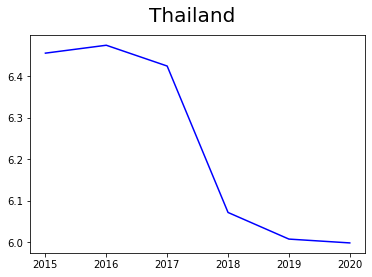

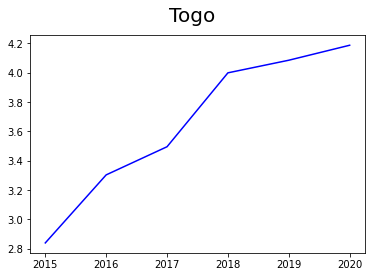

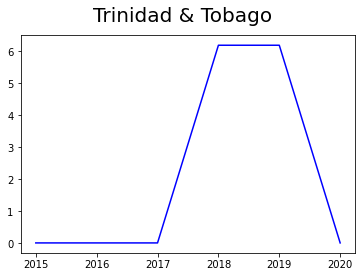

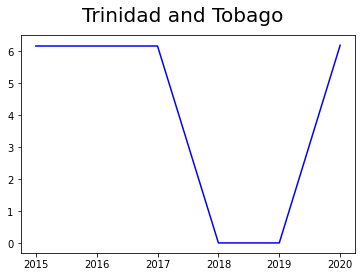

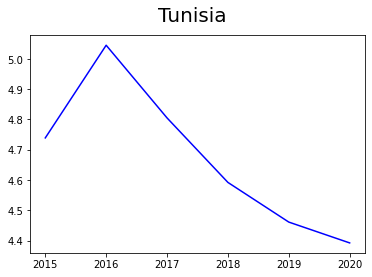

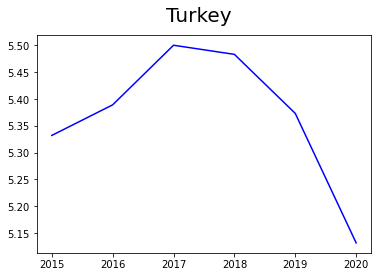

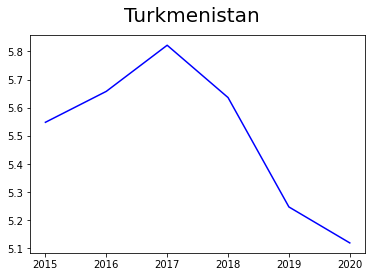

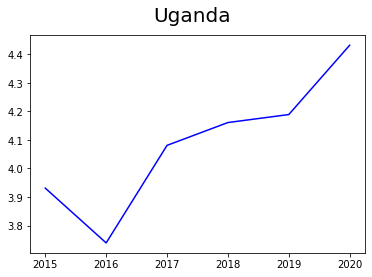

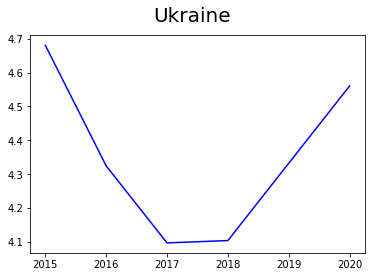

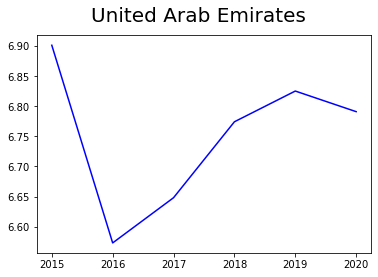

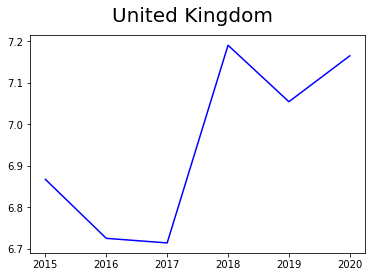

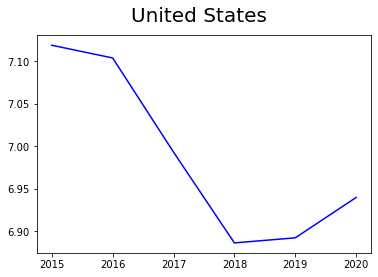

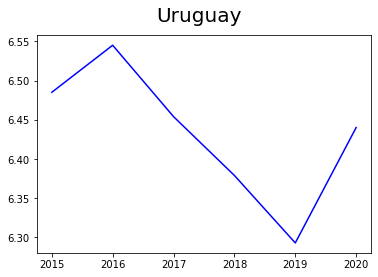

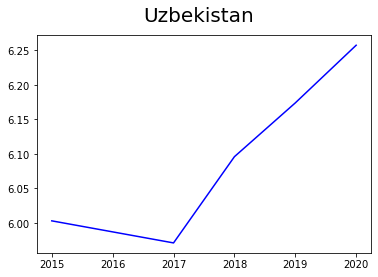

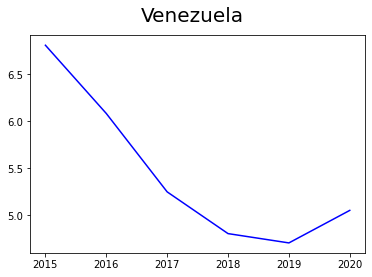

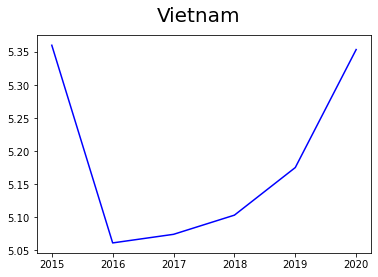

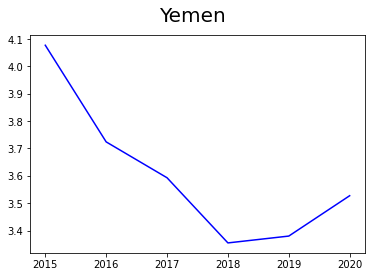

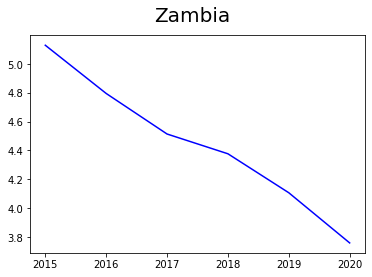

In [ ]:
# Plotting the time series for happiness score

import matplotlib.pyplot as plt
current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0} # dictionary to store happiness scores of the 6 years for all countries
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i] # populate the dictionary for that year
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}:
      fig = plt.figure(i)
      # PLOT THE TIME SERIES
      # label = country name
      plt.plot(list(current_dict.keys()), list(current_dict.values()), color='blue',label=current)
      fig.suptitle(current, fontsize=20)
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

In [ ]:
# Moving average - window size = 5

ape = 0
count = 0

import matplotlib.pyplot as plt
current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i] # populate the dictionary for the country in discussion
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0} and current_dict[2020]!=0:
      # Moving window of size 5
      temp = (current_dict[2015] + current_dict[2016] + current_dict[2017] + current_dict[2018] + current_dict[2019])/5 # average of the last 5 years
      print("Observed: ",current_dict[2020], " Predicted: ",temp)
      ape += abs(temp-current_dict[2020])/current_dict[2020] # accumulate the loss - MAPE for each country
      count = count + 1
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

if df['Country'][i] == current:   # last country
  temp = (current_dict[2015] + current_dict[2016] + current_dict[2017] + current_dict[2018] + current_dict[2019])/5
  print("Observed: ",current_dict[2020], " Predicted: ",temp)
  ape += abs(temp-current_dict[2020])/current_dict[2020]
  count = count + 1

mape = ape/count # find average of the MAPE itself
mape = mape*100

# Average MAPE
print("Mean Absolute Percentage Error: ",mape)

Observed:  2.566900015  Predicted:  3.512799982070922
Observed:  4.882699966000001  Predicted:  4.712600010681152
Observed:  5.005099773  Predicted:  5.667600043487548
Observed:  5.974699974  Predicted:  6.4593999954223635
Observed:  4.676799774  Predicted:  4.39319998550415
Observed:  7.222799778  Predicted:  7.276199983978271
Observed:  7.294199944  Predicted:  7.142000008392334
Observed:  5.164800167  Predicted:  5.22920004119873
Observed:  6.227300167  Predicted:  6.113799978637696
Observed:  4.832799911  Predicted:  4.580199960327148
Observed:  5.539899826  Predicted:  5.597999953460694
Observed:  6.863500117999999  Predicted:  6.92139995880127
Observed:  5.21600008  Predicted:  3.90100001296997
Observed:  5.747499942999999  Predicted:  5.813199990844726
Observed:  5.674099922000001  Predicted:  5.161800032043457
Observed:  3.478899956  Predicted:  3.830000006484986
Observed:  6.375599861  Predicted:  6.6578000457763675
Observed:  5.101500034  Predicted:  4.6186000450134275
Observ

In [ ]:
# Moving average - window size = 4 
# Same procedure as window size 5
# hence not recommenting

ape = 0
count = 0

import matplotlib.pyplot as plt
current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i]
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0} and current_dict[2020]!=0:

      # window size = 4
      temp = (current_dict[2019] + current_dict[2018] + current_dict[2017] + current_dict[2016])/4
      print("Observed: ",current_dict[2020], " Predicted: ",temp)

      # accumulate the losses
      ape += abs(temp-current_dict[2020])/current_dict[2020]
      count = count + 1
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

if df['Country'][i] == current:
  temp = (current_dict[2015] + current_dict[2016] + current_dict[2017] + current_dict[2018])/4
  print("Observed: ",current_dict[2020], " Predicted: ",temp)
  ape += abs(temp-current_dict[2020])/current_dict[2020]
  count = count + 1

mape = ape/count
mape = mape*100
print("Mean Absolute Percentage Error: ",mape)

Observed:  2.566900015  Predicted:  3.4972499775886527
Observed:  4.882699966000001  Predicted:  4.65100001335144
Observed:  5.005099773  Predicted:  5.683250054359435
Observed:  5.974699974  Predicted:  6.430749994277955
Observed:  4.676799774  Predicted:  4.4039999818801885
Observed:  7.222799778  Predicted:  7.27424997997284
Observed:  7.294199944  Predicted:  7.127500010490417
Observed:  5.164800167  Predicted:  5.233500051498413
Observed:  6.227300167  Predicted:  6.15224997329712
Observed:  4.832799911  Predicted:  4.551749950408935
Observed:  5.539899826  Predicted:  5.544249941825868
Observed:  6.863500117999999  Predicted:  6.917499948501587
Observed:  5.21600008  Predicted:  4.041250016212462
Observed:  5.747499942999999  Predicted:  5.793999988555908
Observed:  5.674099922000001  Predicted:  5.215000040054322
Observed:  3.478899956  Predicted:  3.7045000081062325
Observed:  6.375599861  Predicted:  6.576500057220461
Observed:  5.101500034  Predicted:  4.718750056266784
Obser

In [ ]:
# Moving average - window size = 3 
# Same procedure as window size 5
# hence not recommenting


ape = 0
count = 0

import matplotlib.pyplot as plt
current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i]
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0} and current_dict[2020]!=0:
      temp = (current_dict[2019] + current_dict[2018] + current_dict[2017])/3 # window size 3
      print("Observed: ",current_dict[2020], " Predicted: ",temp)
      ape += abs(temp-current_dict[2020])/current_dict[2020]
      count = count + 1
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

if df['Country'][i] == current:
  temp = (current_dict[2019] + current_dict[2018] + current_dict[2017])/3
  print("Observed: ",current_dict[2020], " Predicted: ",temp)
  ape += abs(temp-current_dict[2020])/current_dict[2020]
  count = count + 1

mape = ape/count
mape = mape*100

# Average MAPE
print("Mean Absolute Percentage Error: ",mape)

Observed:  2.566900015  Predicted:  3.542999970118204
Observed:  4.882699966000001  Predicted:  4.6496666844685866
Observed:  5.005099773  Predicted:  5.45933340581258
Observed:  5.974699974  Predicted:  6.357666659037274
Observed:  4.676799774  Predicted:  4.418666642506918
Observed:  7.222799778  Predicted:  7.261333306630454
Observed:  7.294199944  Predicted:  7.130333347320556
Observed:  5.164800167  Predicted:  5.214333401997884
Observed:  6.227300167  Predicted:  6.130333297729493
Observed:  4.832799911  Predicted:  4.521333267211913
Observed:  5.539899826  Predicted:  5.4583332557678235
Observed:  6.863500117999999  Predicted:  6.913666598002116
Observed:  5.21600008  Predicted:  4.227000021616617
Observed:  5.747499942999999  Predicted:  5.7846666514078775
Observed:  5.674099922000001  Predicted:  5.232333386739096
Observed:  3.478899956  Predicted:  3.6146666774749767
Observed:  6.375599861  Predicted:  6.4513334096272805
Observed:  5.101500034  Predicted:  4.8860000750223795


Model 1 - Simple Moving Average

k = 5 : MAPE = 9.931773438957023                                   

k = 4 : MAPE = 9.914309752710313


k = 3 : MAPE = 9.069818554831631

In [ ]:
# Exponential Smoothing

countries=df['Country']
countries=list(set(countries)) #contains the list of all the countires

from statsmodels.tsa.holtwinters import ExponentialSmoothing # model to be applied

#collecting all the country names for which the data is available for all 6 years
final=[]
for i in countries:
  d=df[df['Country']==i]
  if(len(d)==6):
    final.append(i)

mse=0
mape=0
for i in final:
  d=df[df['Country']==i]
  x=d[d['year']==2020]   # expected value
  d=d[d['year']!=2020]   # data to be used to build the model
  
  #print(len(x),len(d))
  d=d['Happiness Score'] # retaining only the happiness score values
  x=x['Happiness Score']  # getting rid of unnecessary variables

  x=x.values.astype('float32') # convert the values to float
  d=d.values.astype('float32')

  #predicting the value for 2020 using the years 2015,2016,2017,2018,2019
  model = ExponentialSmoothing(d)
  model_fit = model.fit()
  yhat = model_fit.predict()

  mse=mse + ((x[0]-yhat[0])**2)
  mape=mape+(abs(x[0]-yhat[0])/x[0])
  print("Observed: ",x[0], " Predicted: ",yhat[0])

mape=mape/len(final)
print("Mean Absolute Percentage Error: ",mape*100)

Observed:  5.5415  Predicted:  5.285999774932861
Observed:  4.9808  Predicted:  4.394000000383577
Observed:  5.1372  Predicted:  4.812400054163588
Observed:  5.3535  Predicted:  5.154600043969332
Observed:  4.5607  Predicted:  4.307200045380228
Observed:  6.9396  Predicted:  6.998800082001016
Observed:  3.5274  Predicted:  3.389297455174544
Observed:  6.8635  Predicted:  6.921399877227758
Observed:  4.7848  Predicted:  4.528399939343896
Observed:  4.9096  Predicted:  4.104599901169736
Observed:  6.1634  Predicted:  6.34000005518698
Observed:  4.327  Predicted:  4.39260005451585
Observed:  5.95  Predicted:  5.6762000047590355
Observed:  6.3048  Predicted:  6.53800000773192
Observed:  5.9532  Predicted:  4.788000106811523
Observed:  5.7968  Predicted:  5.728400034658522
Observed:  7.2942  Predicted:  7.141999907326511
Observed:  2.5669  Predicted:  3.5127999788322253
Observed:  4.5528  Predicted:  4.736600107915854
Observed:  5.546  Predicted:  5.79859990573176
Observed:  6.1021  Predict

Model 2 - Holt-Winter's Exponential Smoothing Model

MAPE = 6.236519468744002

Thus we see that Exponential Smoothing performs better than Simple Moving Average


This is because the data does have a **trend** component, which SMA cannot capture

In [ ]:
# Checking if we can perform ARMA or ARIMA
# Augmented Dickey-Fuller Test to check for auto regression - example of a unit root test
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend
# no of unit roots = degree of differencing
# H0 : non stationary
# H1 : stationary

from statsmodels.tsa.stattools import adfuller
count = 0
current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i]
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}:
      l = pd.DataFrame(current_dict.values(),columns =['happiness scores'])
      result = adfuller(l['happiness scores']) # returns an array containing critical value, p value, and critical values at different confidence levels
      print('ADF Statistic: %f' % result[0]) # D
      print('p-value: %f' % result[1]) # p value
      for key, value in result[4].items(): # print critical value
        print('Critial Values:')
        print(f'   {key}, {value}')
      if (result[1]>0.05): # COLLECT COUNT OF COUNTRIES FOR WHICH NULL HYPOTHESIS CAN BE REJECTED
        count += 1
    print("----------------------------------------------------------------------------------------------------------")
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

----------------------------------------------------------------------------------------------------------
ADF Statistic: 0.095933
p-value: 0.965782
Critial Values:
   1%, -6.045114
Critial Values:
   5%, -3.9292800000000003
Critial Values:
   10%, -2.98681
----------------------------------------------------------------------------------------------------------
ADF Statistic: -2.248666
p-value: 0.189059
Critial Values:
   1%, -6.045114
Critial Values:
   5%, -3.9292800000000003
Critial Values:
   10%, -2.98681
----------------------------------------------------------------------------------------------------------
ADF Statistic: -0.711028
p-value: 0.843872
Critial Values:
   1%, -6.045114
Critial Values:
   5%, -3.9292800000000003
Critial Values:
   10%, -2.98681
----------------------------------------------------------------------------------------------------------
ADF Statistic: 1.022132
p-value: 0.994494
Critial Values:
   1%, -7.355440625
Critial Values:
   5%, -4.4743650000000

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


ADF Statistic: -1.029200
p-value: 0.742466
Critial Values:
   1%, -7.355440625
Critial Values:
   5%, -4.474365000000001
Critial Values:
   10%, -3.1269325
----------------------------------------------------------------------------------------------------------
ADF Statistic: -1.729065
p-value: 0.416203
Critial Values:
   1%, -7.355440625
Critial Values:
   5%, -4.474365000000001
Critial Values:
   10%, -3.1269325
----------------------------------------------------------------------------------------------------------
ADF Statistic: -104.251514
p-value: 0.000000
Critial Values:
   1%, -7.355440625
Critial Values:
   5%, -4.474365000000001
Critial Values:
   10%, -3.1269325
----------------------------------------------------------------------------------------------------------
ADF Statistic: 0.821559
p-value: 0.991976
Critial Values:
   1%, -6.045114
Critial Values:
   5%, -3.9292800000000003
Critial Values:
   10%, -2.98681
----------------------------------------------------------

In [ ]:
print("alpha less than p value in",count/len(df),"of the cases")

alpha less than p value in 0.13262032085561498 of the cases
Since this is a small number, we cannot reject the null hypothesis
The time series data is non-stationary - needs differencing
Need to go for ARIMA


Since this is a small number, we cannot reject the null hypothesis


The time series data is non-stationary - needs differencing


Need to go for ARIMA

----------------------------------------------------------------------------------------------------------


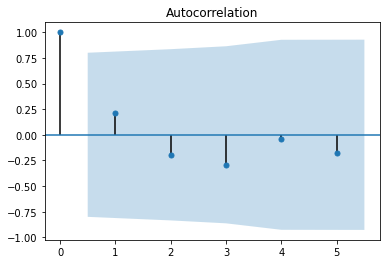

----------------------------------------------------------------------------------------------------------


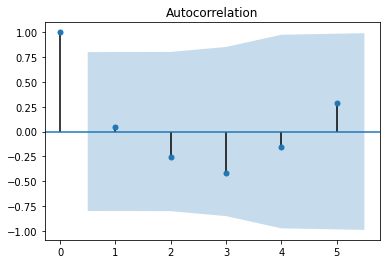

----------------------------------------------------------------------------------------------------------


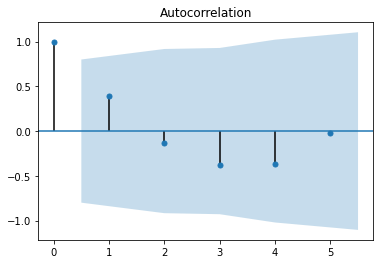

----------------------------------------------------------------------------------------------------------


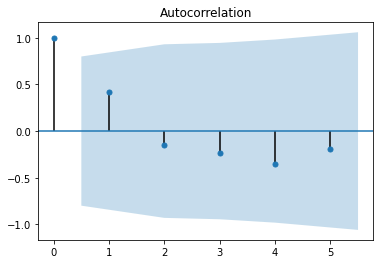

----------------------------------------------------------------------------------------------------------


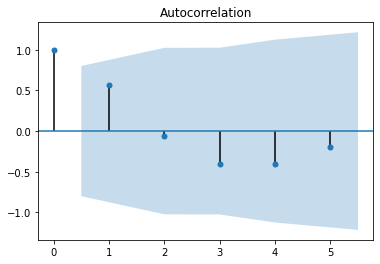

----------------------------------------------------------------------------------------------------------


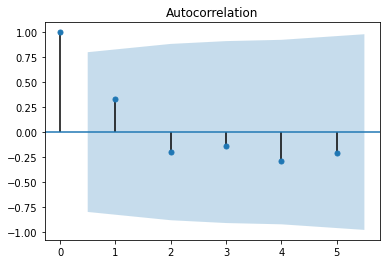

----------------------------------------------------------------------------------------------------------


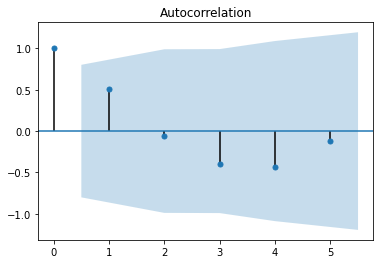

----------------------------------------------------------------------------------------------------------


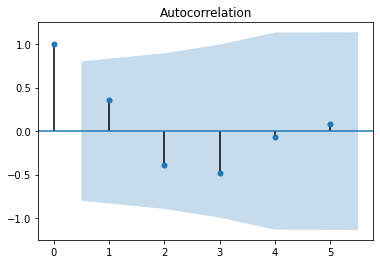

----------------------------------------------------------------------------------------------------------


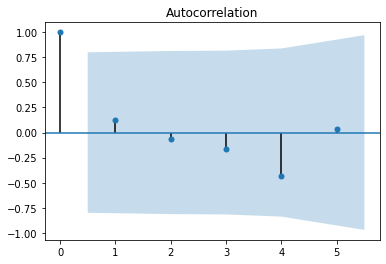

----------------------------------------------------------------------------------------------------------


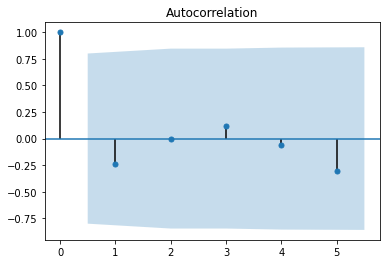

----------------------------------------------------------------------------------------------------------


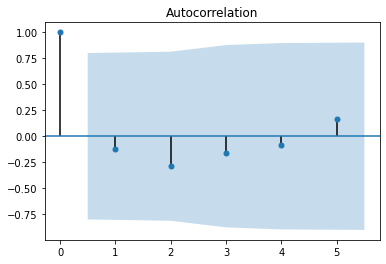

----------------------------------------------------------------------------------------------------------


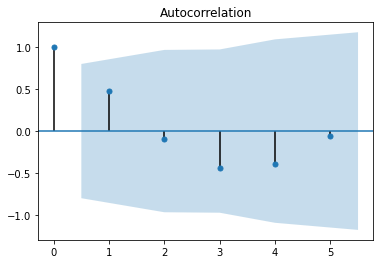

----------------------------------------------------------------------------------------------------------


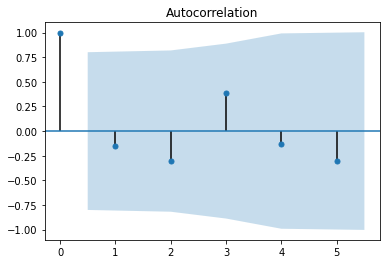

----------------------------------------------------------------------------------------------------------


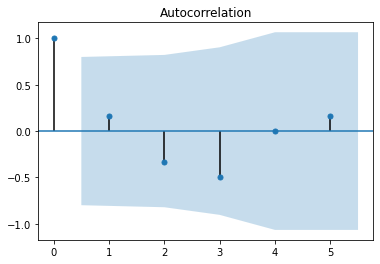

----------------------------------------------------------------------------------------------------------


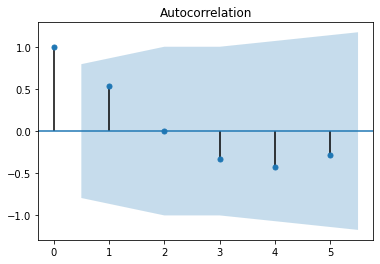

----------------------------------------------------------------------------------------------------------


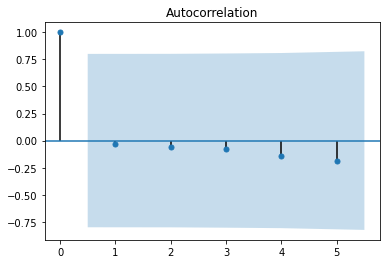

----------------------------------------------------------------------------------------------------------


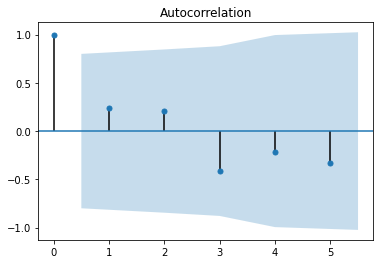

----------------------------------------------------------------------------------------------------------


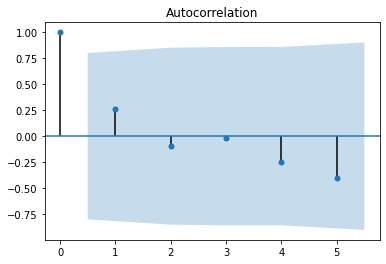

----------------------------------------------------------------------------------------------------------


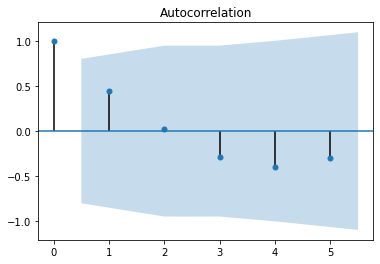

----------------------------------------------------------------------------------------------------------


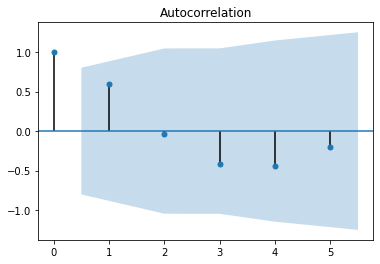

----------------------------------------------------------------------------------------------------------


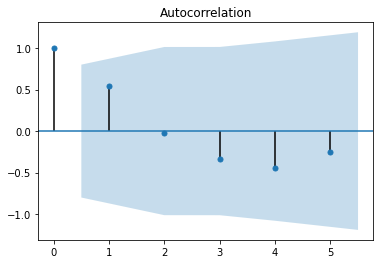

----------------------------------------------------------------------------------------------------------


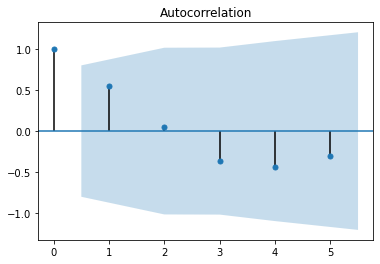

----------------------------------------------------------------------------------------------------------


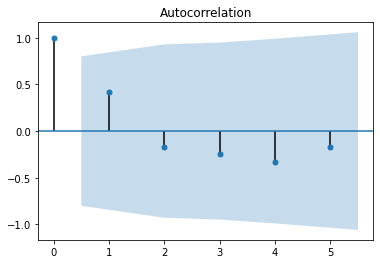

----------------------------------------------------------------------------------------------------------


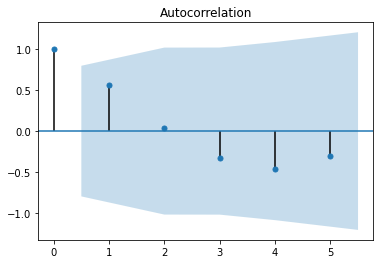

----------------------------------------------------------------------------------------------------------


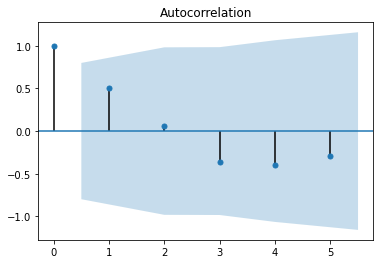

----------------------------------------------------------------------------------------------------------


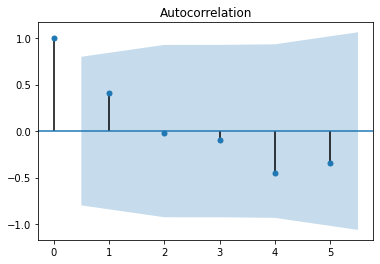

----------------------------------------------------------------------------------------------------------


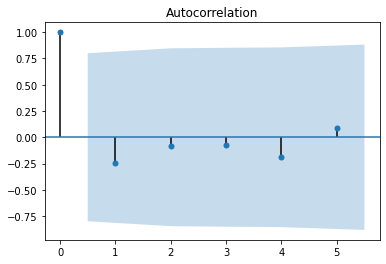

----------------------------------------------------------------------------------------------------------


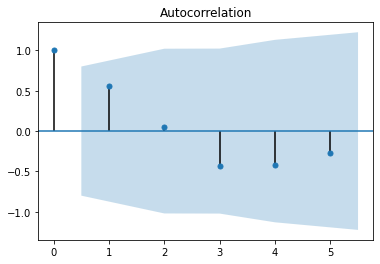

----------------------------------------------------------------------------------------------------------


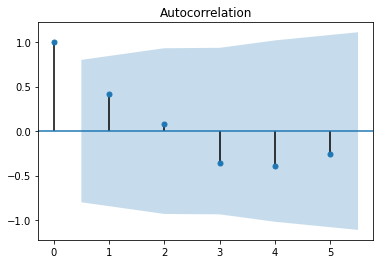

----------------------------------------------------------------------------------------------------------


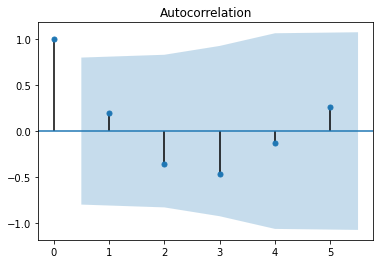

----------------------------------------------------------------------------------------------------------


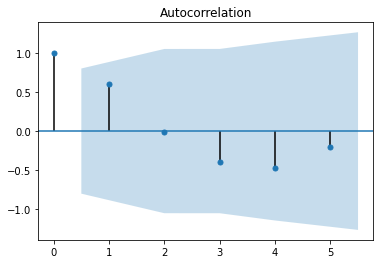

----------------------------------------------------------------------------------------------------------


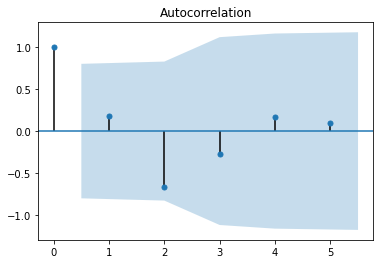

----------------------------------------------------------------------------------------------------------


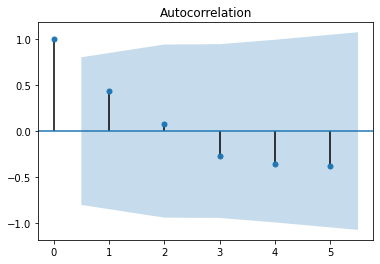

----------------------------------------------------------------------------------------------------------


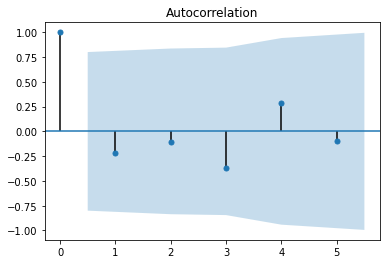

----------------------------------------------------------------------------------------------------------


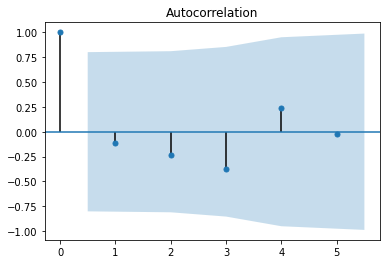

----------------------------------------------------------------------------------------------------------


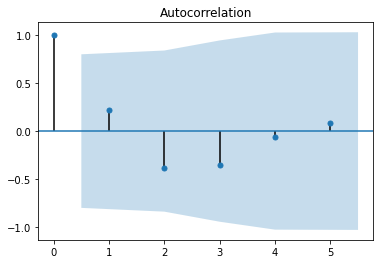

----------------------------------------------------------------------------------------------------------


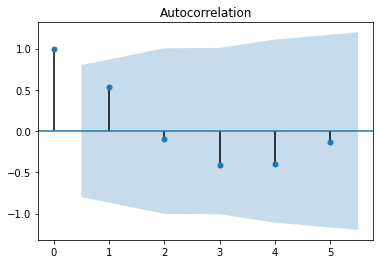

----------------------------------------------------------------------------------------------------------


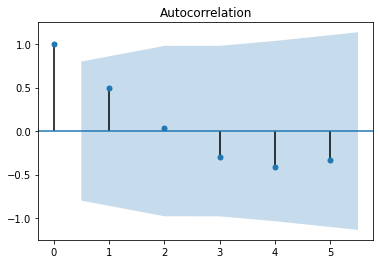

----------------------------------------------------------------------------------------------------------


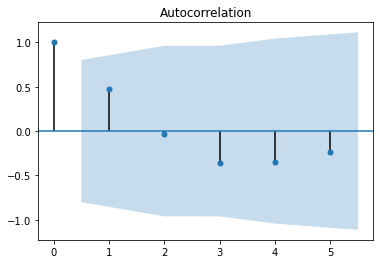

----------------------------------------------------------------------------------------------------------


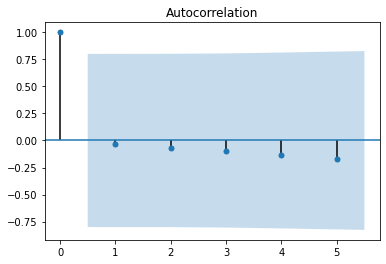

----------------------------------------------------------------------------------------------------------


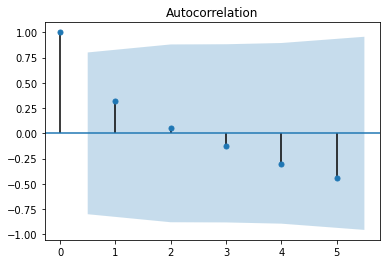

----------------------------------------------------------------------------------------------------------


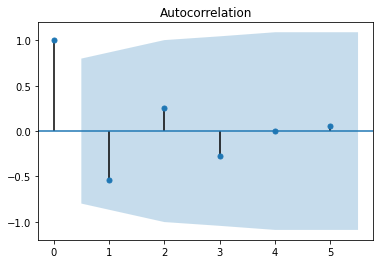

----------------------------------------------------------------------------------------------------------


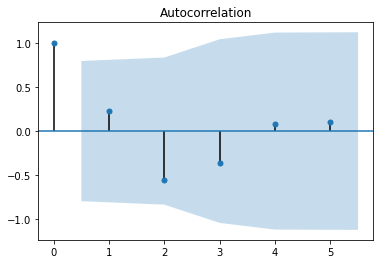

----------------------------------------------------------------------------------------------------------


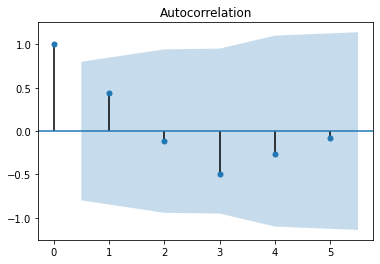

----------------------------------------------------------------------------------------------------------


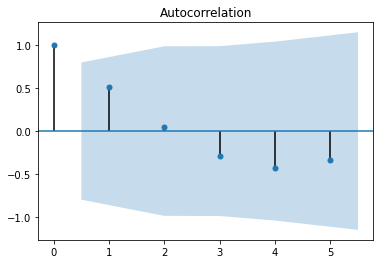

----------------------------------------------------------------------------------------------------------


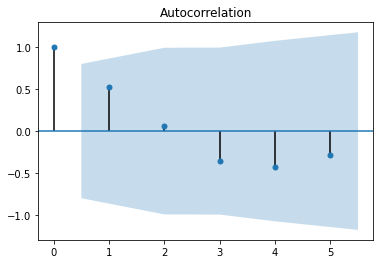

----------------------------------------------------------------------------------------------------------


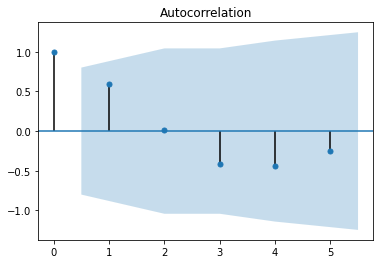

----------------------------------------------------------------------------------------------------------


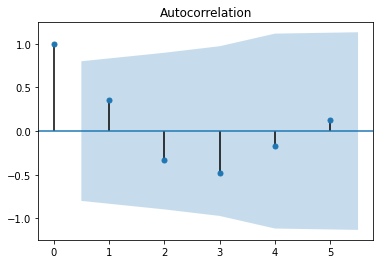

----------------------------------------------------------------------------------------------------------


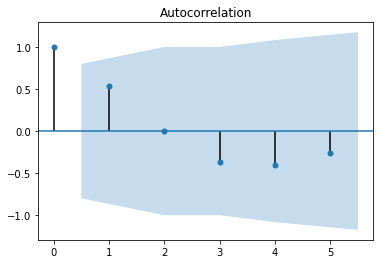

----------------------------------------------------------------------------------------------------------


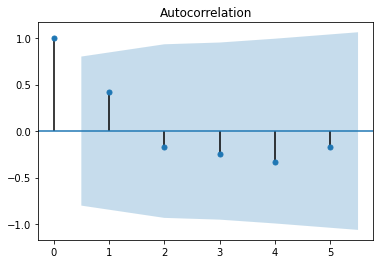

----------------------------------------------------------------------------------------------------------


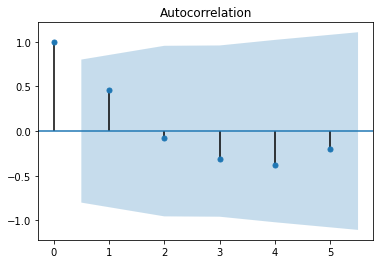

----------------------------------------------------------------------------------------------------------


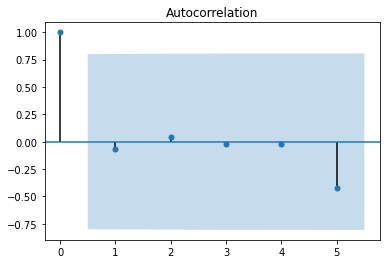

----------------------------------------------------------------------------------------------------------


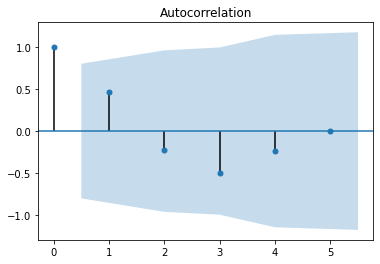

----------------------------------------------------------------------------------------------------------


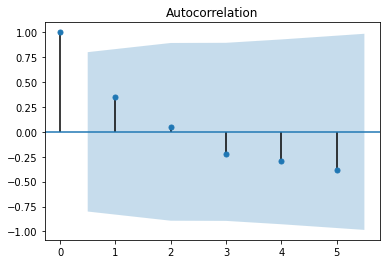

----------------------------------------------------------------------------------------------------------


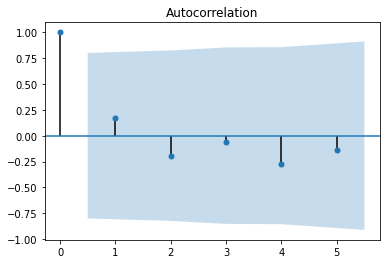

----------------------------------------------------------------------------------------------------------


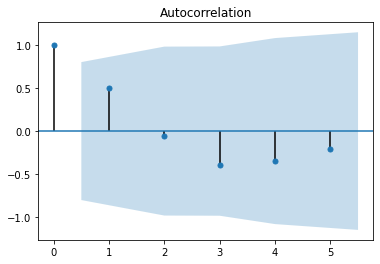

----------------------------------------------------------------------------------------------------------


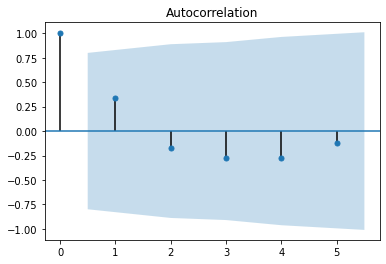

----------------------------------------------------------------------------------------------------------


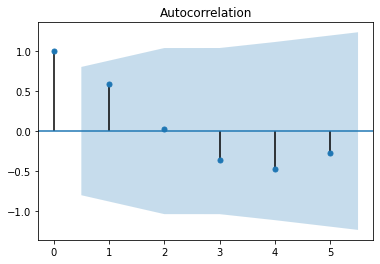

----------------------------------------------------------------------------------------------------------


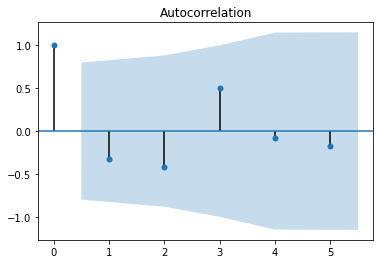

----------------------------------------------------------------------------------------------------------


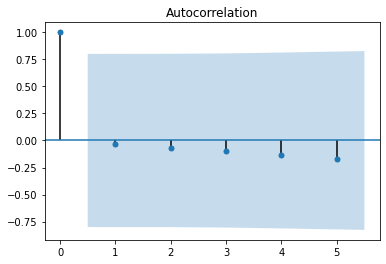

----------------------------------------------------------------------------------------------------------


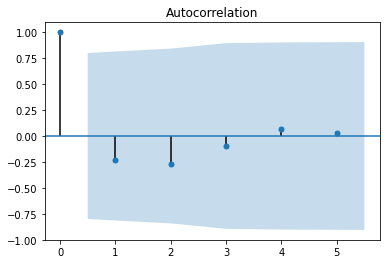

----------------------------------------------------------------------------------------------------------


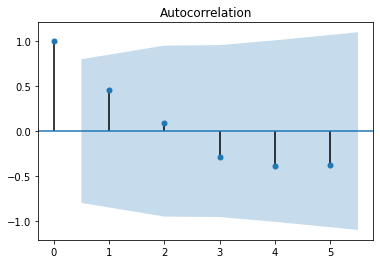

----------------------------------------------------------------------------------------------------------


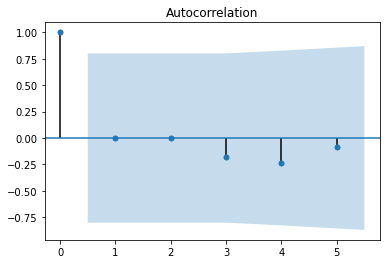

----------------------------------------------------------------------------------------------------------


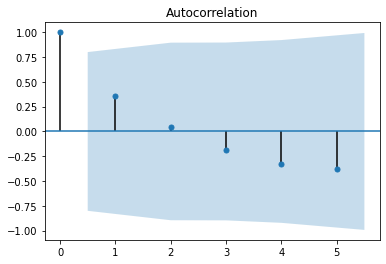

----------------------------------------------------------------------------------------------------------


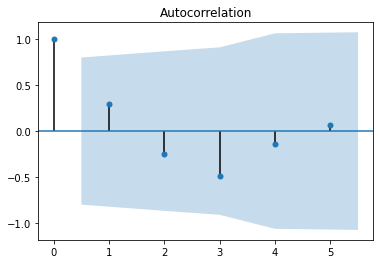

----------------------------------------------------------------------------------------------------------


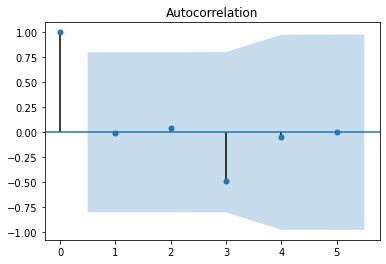

----------------------------------------------------------------------------------------------------------


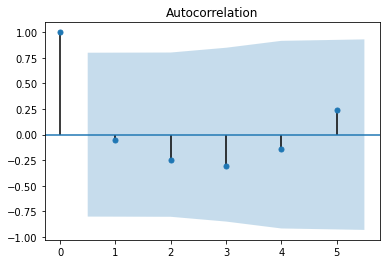

----------------------------------------------------------------------------------------------------------


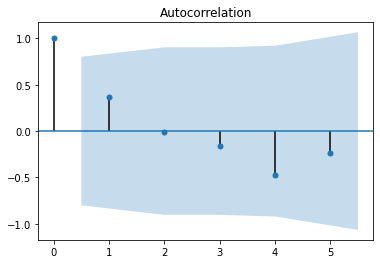

----------------------------------------------------------------------------------------------------------


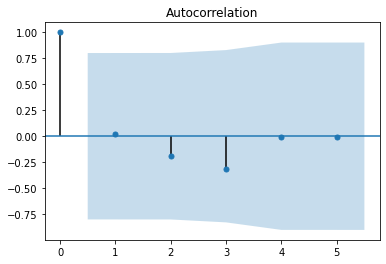

----------------------------------------------------------------------------------------------------------


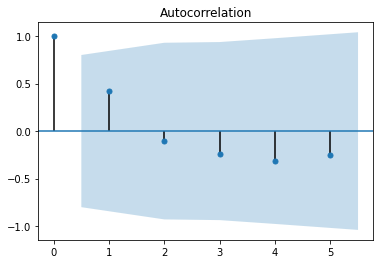

----------------------------------------------------------------------------------------------------------


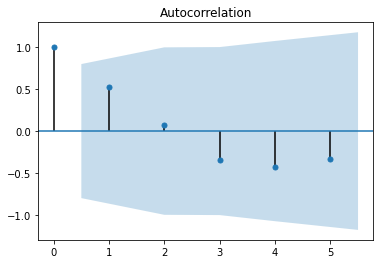

----------------------------------------------------------------------------------------------------------


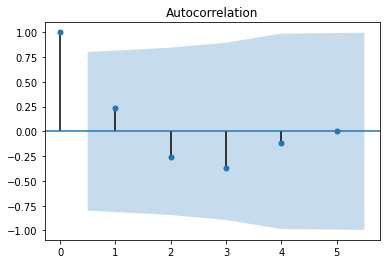

----------------------------------------------------------------------------------------------------------


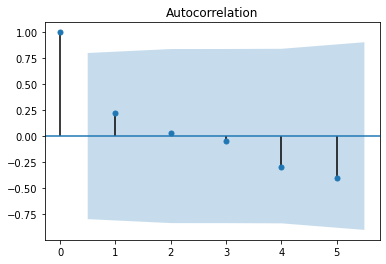

----------------------------------------------------------------------------------------------------------


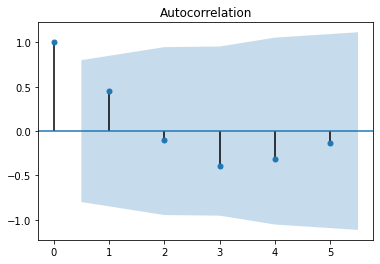

----------------------------------------------------------------------------------------------------------


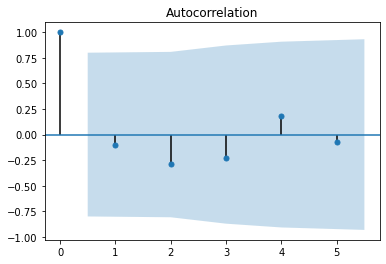

----------------------------------------------------------------------------------------------------------


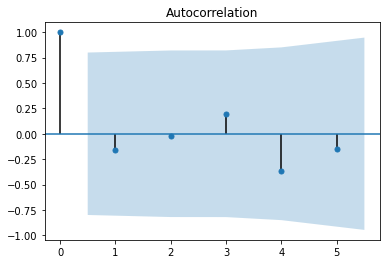

----------------------------------------------------------------------------------------------------------


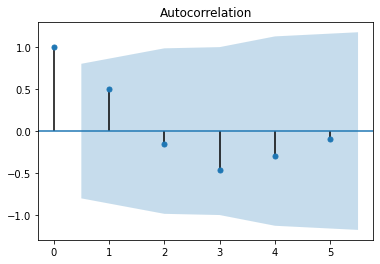

----------------------------------------------------------------------------------------------------------


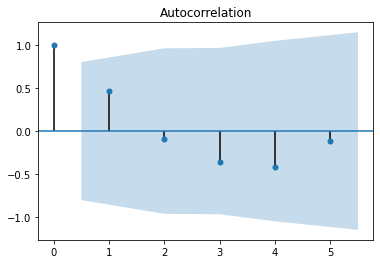

----------------------------------------------------------------------------------------------------------


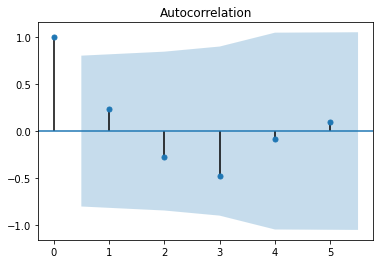

----------------------------------------------------------------------------------------------------------


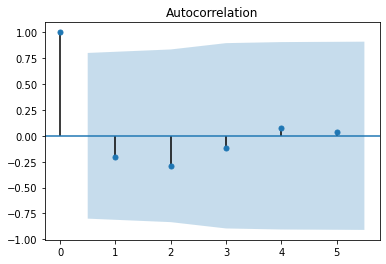

----------------------------------------------------------------------------------------------------------


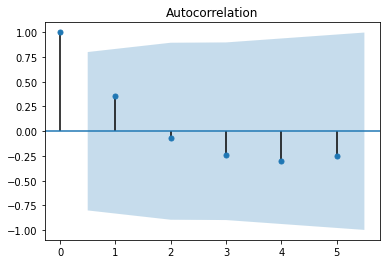

----------------------------------------------------------------------------------------------------------


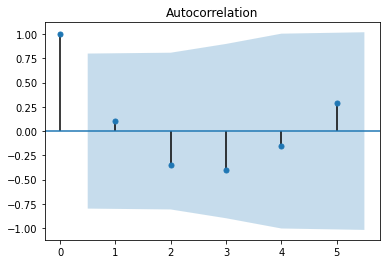

----------------------------------------------------------------------------------------------------------


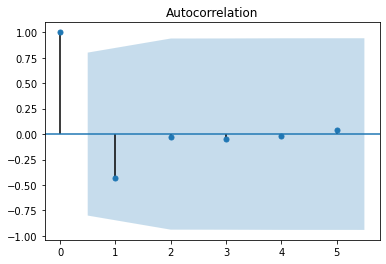

----------------------------------------------------------------------------------------------------------


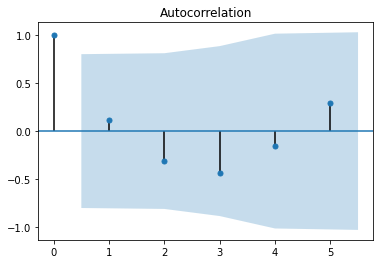

----------------------------------------------------------------------------------------------------------


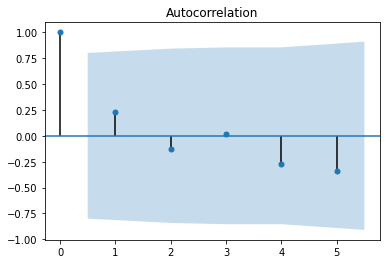

----------------------------------------------------------------------------------------------------------


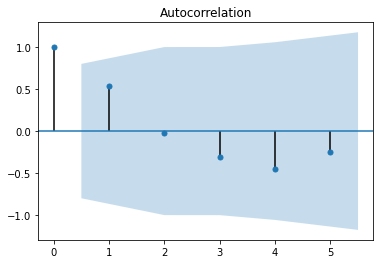

----------------------------------------------------------------------------------------------------------


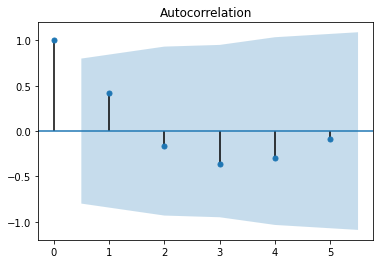

----------------------------------------------------------------------------------------------------------


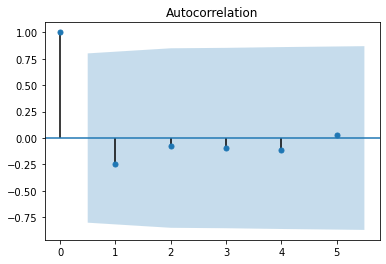

----------------------------------------------------------------------------------------------------------


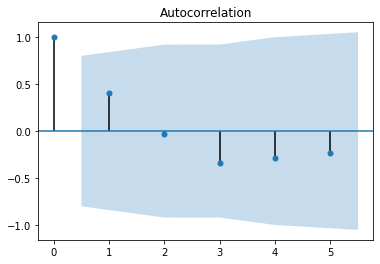

----------------------------------------------------------------------------------------------------------


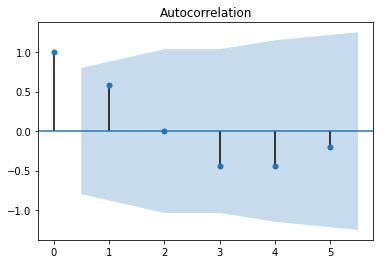

----------------------------------------------------------------------------------------------------------


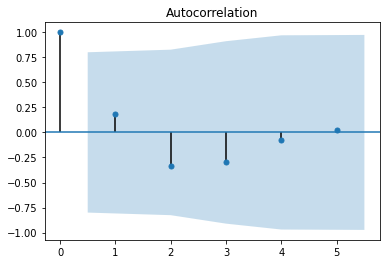

----------------------------------------------------------------------------------------------------------


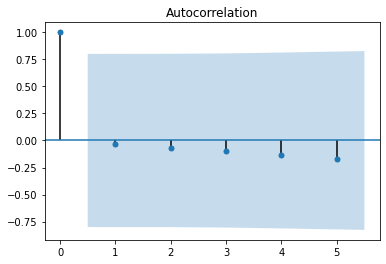

----------------------------------------------------------------------------------------------------------


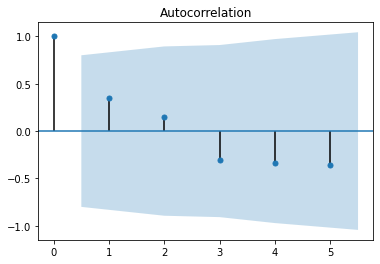

----------------------------------------------------------------------------------------------------------


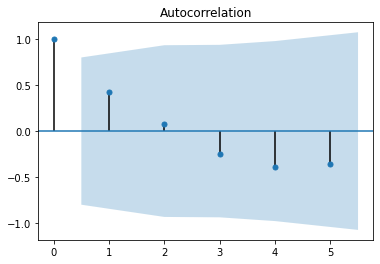

----------------------------------------------------------------------------------------------------------


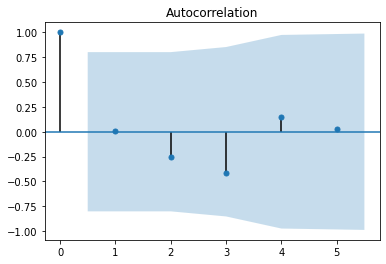

----------------------------------------------------------------------------------------------------------


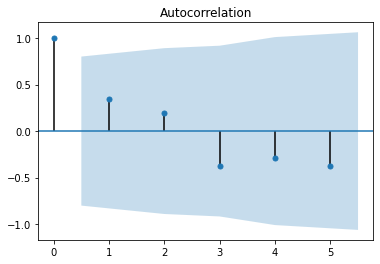

----------------------------------------------------------------------------------------------------------


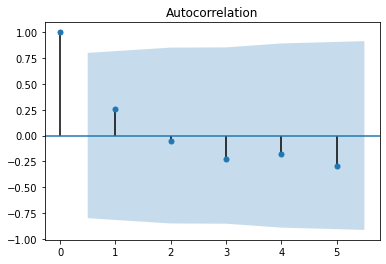

----------------------------------------------------------------------------------------------------------


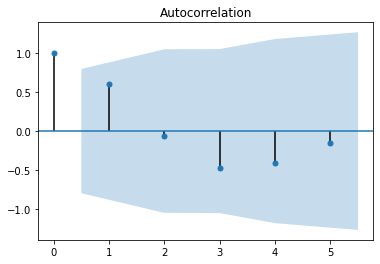

----------------------------------------------------------------------------------------------------------


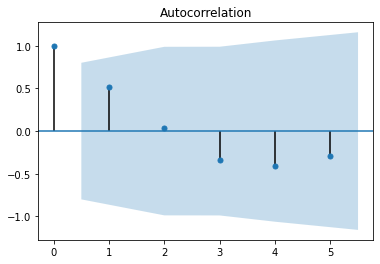

----------------------------------------------------------------------------------------------------------


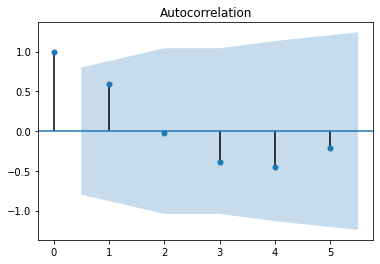

----------------------------------------------------------------------------------------------------------


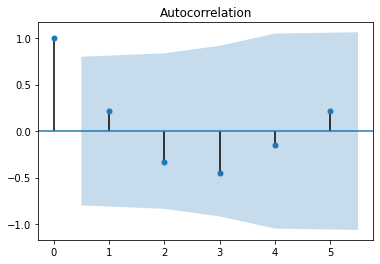

----------------------------------------------------------------------------------------------------------


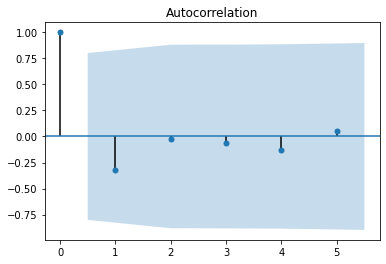

----------------------------------------------------------------------------------------------------------


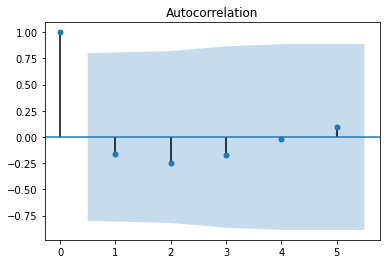

----------------------------------------------------------------------------------------------------------


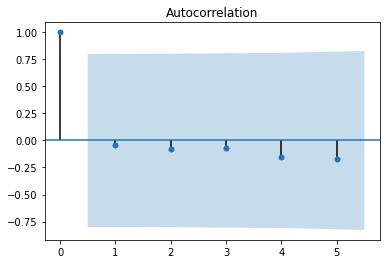

----------------------------------------------------------------------------------------------------------


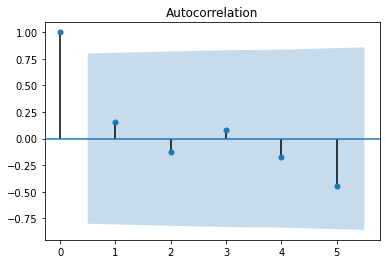

----------------------------------------------------------------------------------------------------------


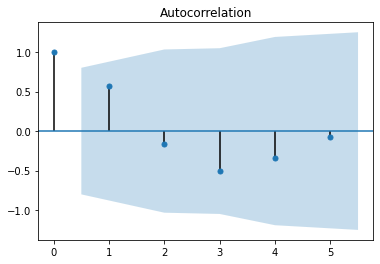

----------------------------------------------------------------------------------------------------------


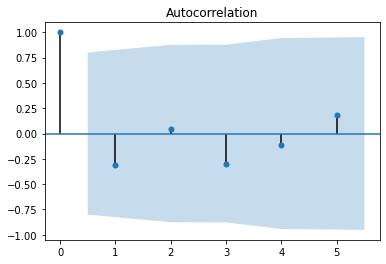

----------------------------------------------------------------------------------------------------------


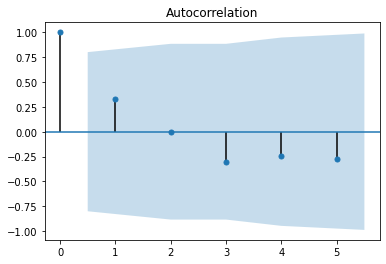

----------------------------------------------------------------------------------------------------------


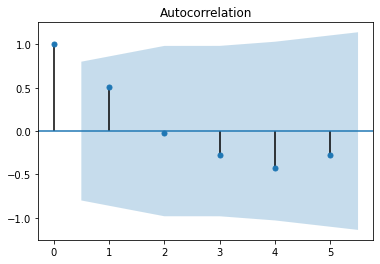

----------------------------------------------------------------------------------------------------------


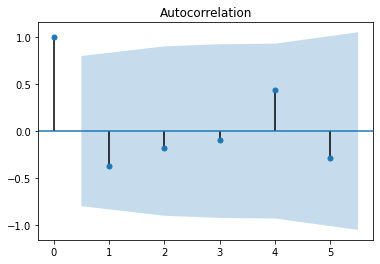

----------------------------------------------------------------------------------------------------------


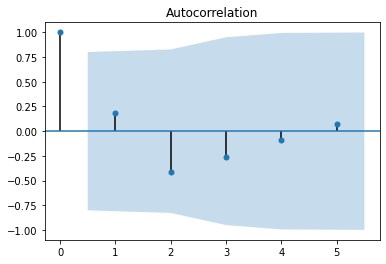

----------------------------------------------------------------------------------------------------------


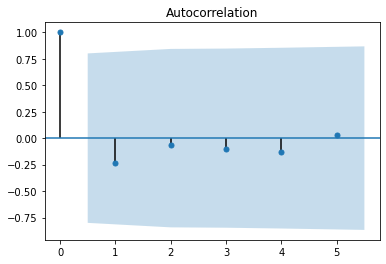

----------------------------------------------------------------------------------------------------------


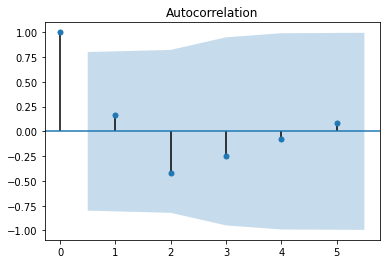

----------------------------------------------------------------------------------------------------------


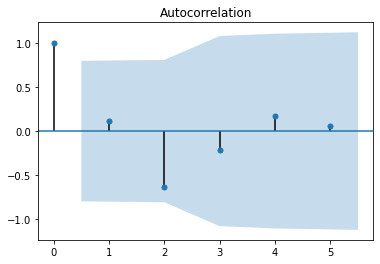

----------------------------------------------------------------------------------------------------------


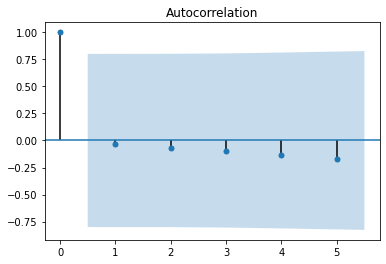

----------------------------------------------------------------------------------------------------------


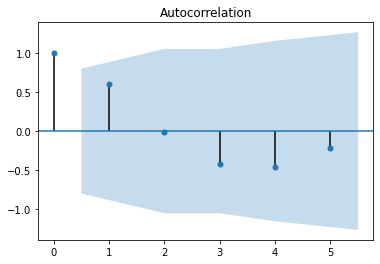

----------------------------------------------------------------------------------------------------------


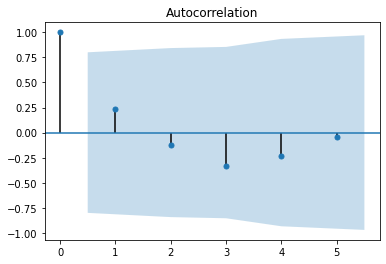

----------------------------------------------------------------------------------------------------------


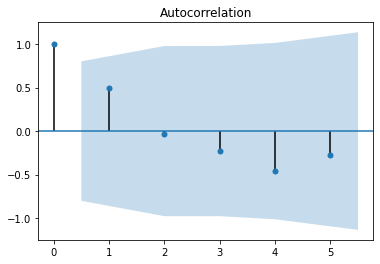

----------------------------------------------------------------------------------------------------------


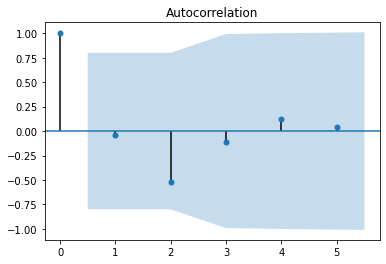

----------------------------------------------------------------------------------------------------------


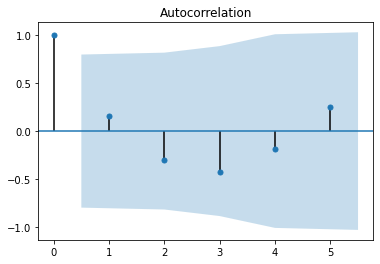

----------------------------------------------------------------------------------------------------------


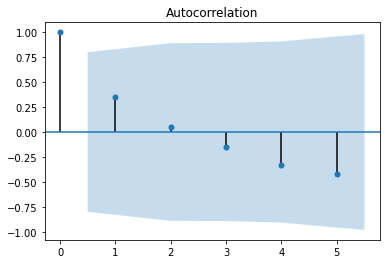

----------------------------------------------------------------------------------------------------------


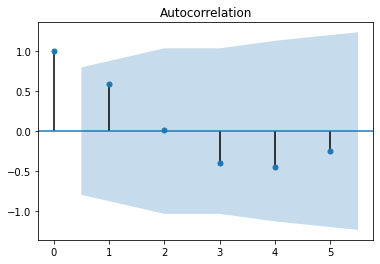

----------------------------------------------------------------------------------------------------------


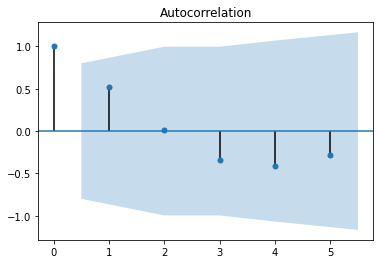

----------------------------------------------------------------------------------------------------------


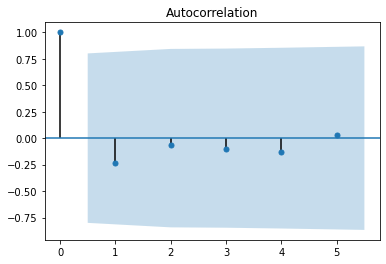

----------------------------------------------------------------------------------------------------------


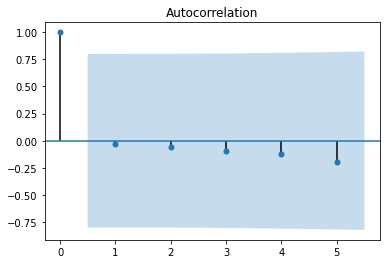

----------------------------------------------------------------------------------------------------------


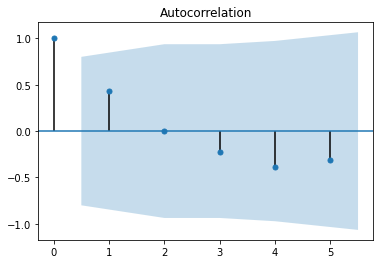

----------------------------------------------------------------------------------------------------------


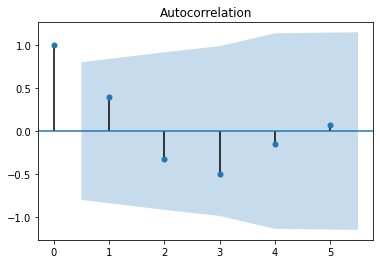

----------------------------------------------------------------------------------------------------------


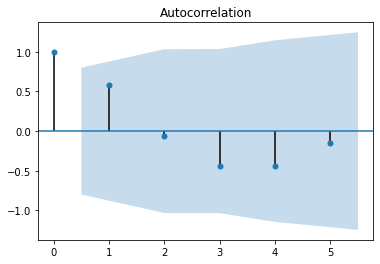

----------------------------------------------------------------------------------------------------------


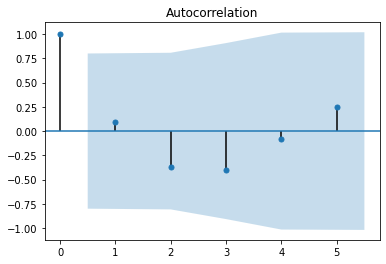

----------------------------------------------------------------------------------------------------------


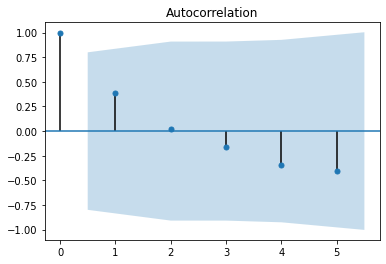

----------------------------------------------------------------------------------------------------------


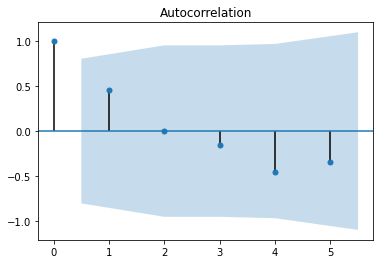

----------------------------------------------------------------------------------------------------------


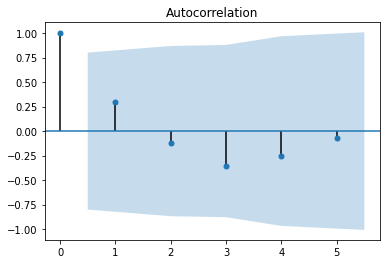

----------------------------------------------------------------------------------------------------------


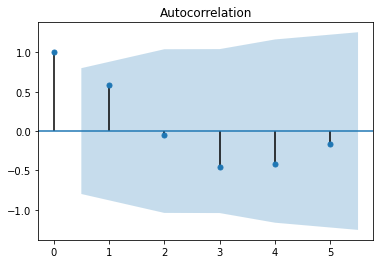

----------------------------------------------------------------------------------------------------------


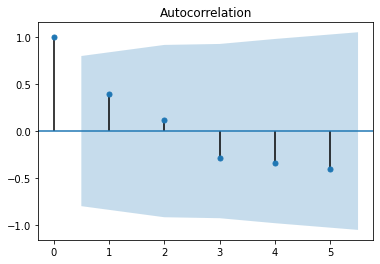

----------------------------------------------------------------------------------------------------------


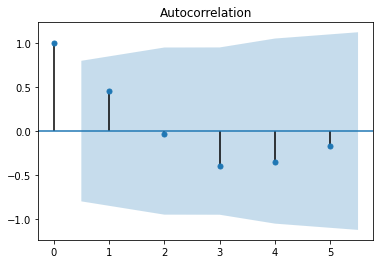

----------------------------------------------------------------------------------------------------------


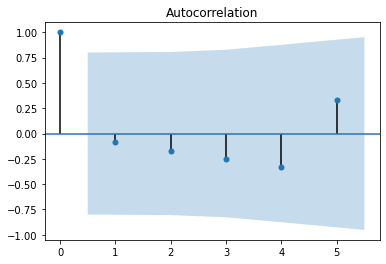

----------------------------------------------------------------------------------------------------------


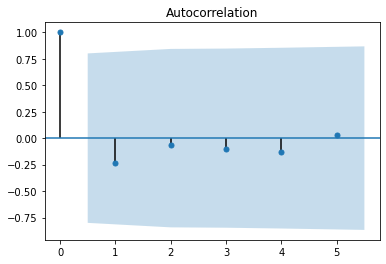

----------------------------------------------------------------------------------------------------------


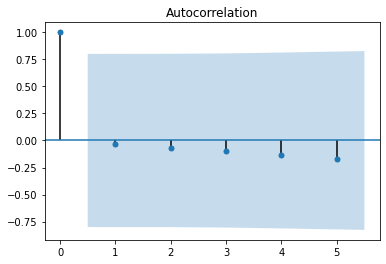

----------------------------------------------------------------------------------------------------------


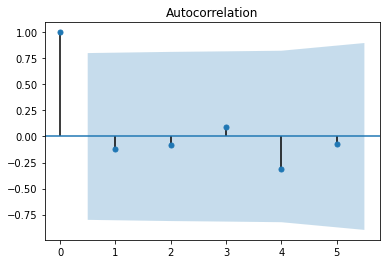

----------------------------------------------------------------------------------------------------------


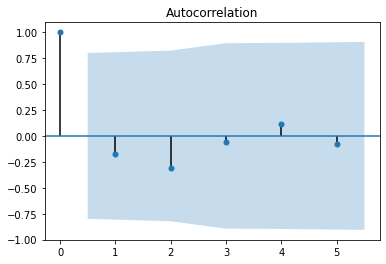

----------------------------------------------------------------------------------------------------------


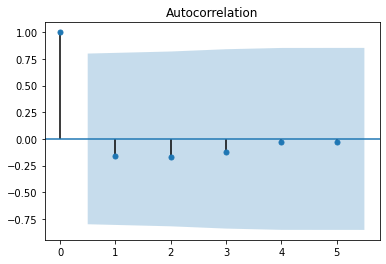

----------------------------------------------------------------------------------------------------------


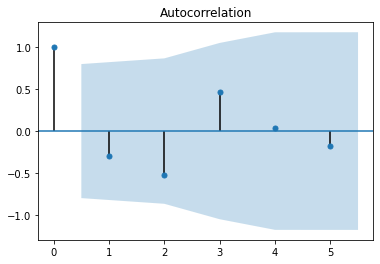

----------------------------------------------------------------------------------------------------------


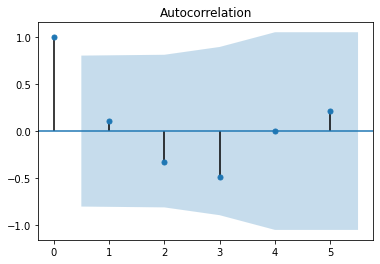

----------------------------------------------------------------------------------------------------------


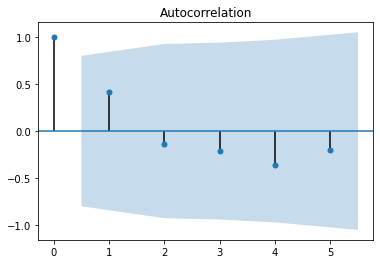

----------------------------------------------------------------------------------------------------------


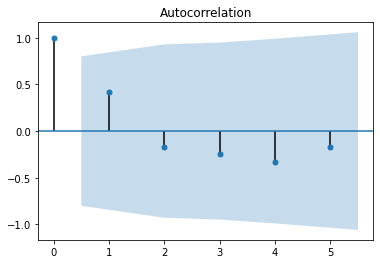

----------------------------------------------------------------------------------------------------------


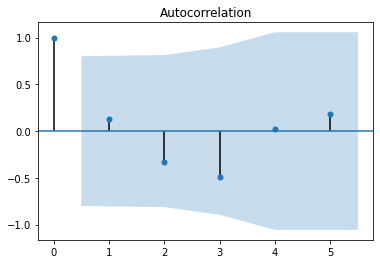

----------------------------------------------------------------------------------------------------------


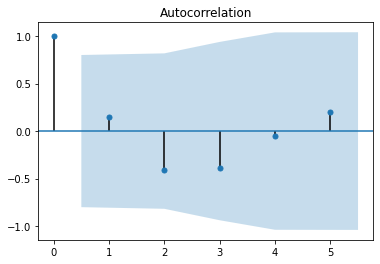

----------------------------------------------------------------------------------------------------------


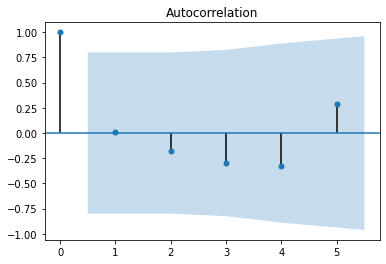

----------------------------------------------------------------------------------------------------------


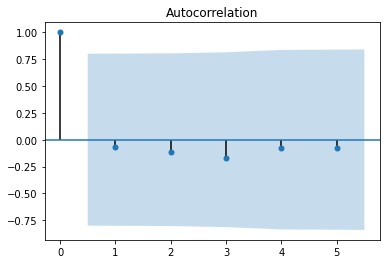

----------------------------------------------------------------------------------------------------------


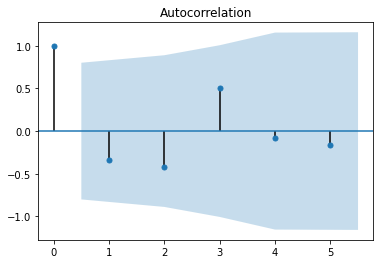

----------------------------------------------------------------------------------------------------------


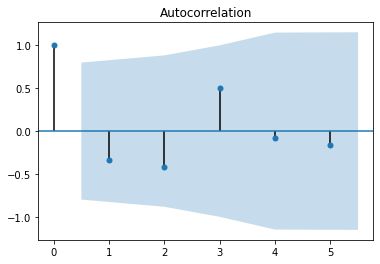

----------------------------------------------------------------------------------------------------------


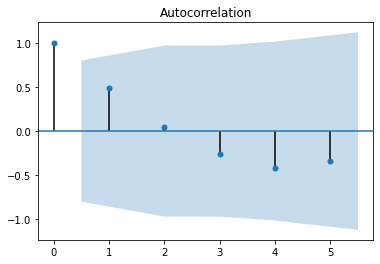

----------------------------------------------------------------------------------------------------------


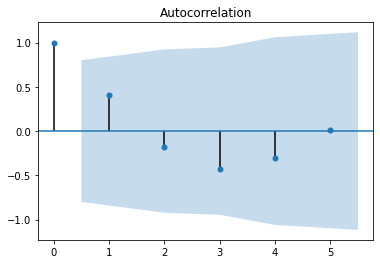

----------------------------------------------------------------------------------------------------------


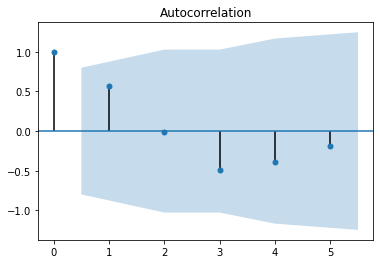

----------------------------------------------------------------------------------------------------------


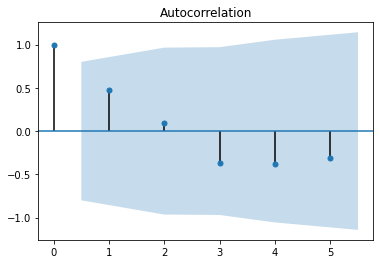

----------------------------------------------------------------------------------------------------------


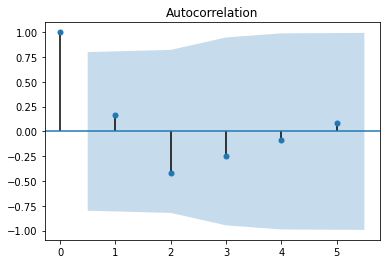

----------------------------------------------------------------------------------------------------------


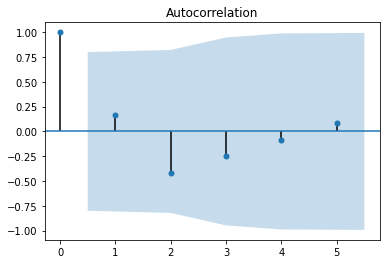

----------------------------------------------------------------------------------------------------------


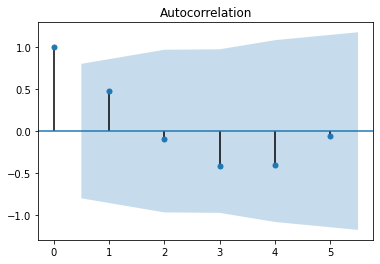

----------------------------------------------------------------------------------------------------------


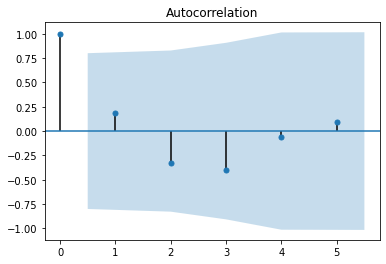

----------------------------------------------------------------------------------------------------------


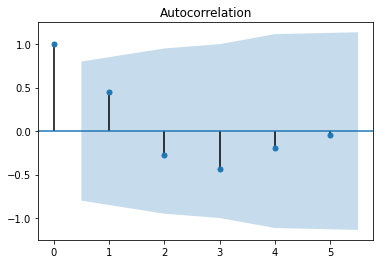

----------------------------------------------------------------------------------------------------------


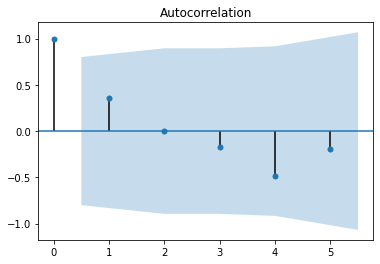

----------------------------------------------------------------------------------------------------------


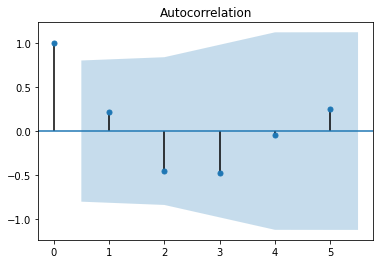

----------------------------------------------------------------------------------------------------------


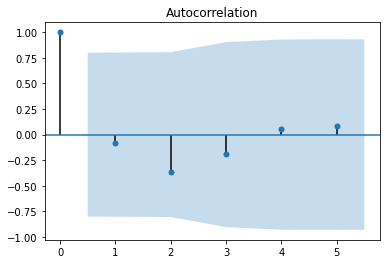

----------------------------------------------------------------------------------------------------------


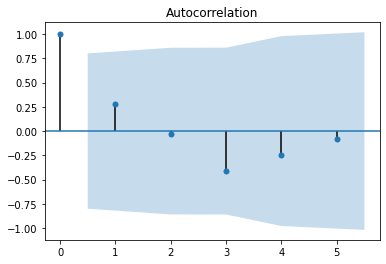

----------------------------------------------------------------------------------------------------------


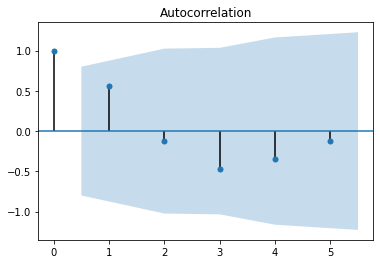

----------------------------------------------------------------------------------------------------------


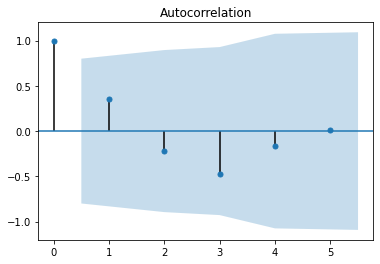

----------------------------------------------------------------------------------------------------------


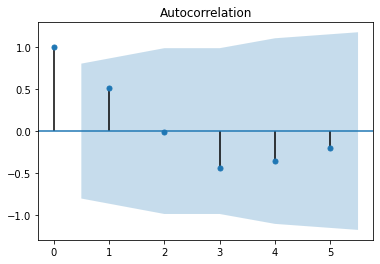

----------------------------------------------------------------------------------------------------------


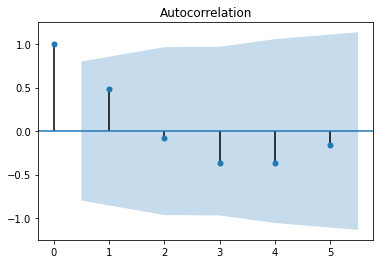

----------------------------------------------------------------------------------------------------------


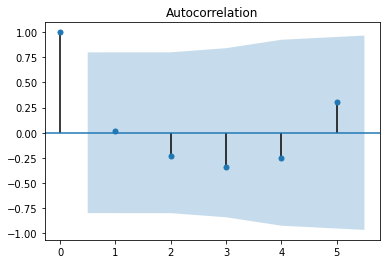

----------------------------------------------------------------------------------------------------------


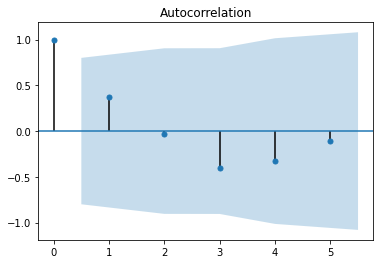

----------------------------------------------------------------------------------------------------------


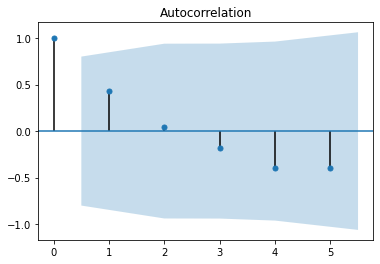

----------------------------------------------------------------------------------------------------------


In [ ]:
# Since the data is non stationary, ARMA is out of the question
# Lets check for ARIMA
# Plotting ACF
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i]
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}:
      l = pd.DataFrame(current_dict.values(),columns =['happiness scores'])
      plot_acf(l['happiness scores']) # ACF plot
      pyplot.show() # show the plot
    print("----------------------------------------------------------------------------------------------------------")
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

Observing the above plots for ACF at different lags,
we see that more or less all countries show exponential decay of ACF

**(ACF decreases nearly exponentially but doesn't drop off)**

This forms one part of identifying the ARIMA model

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


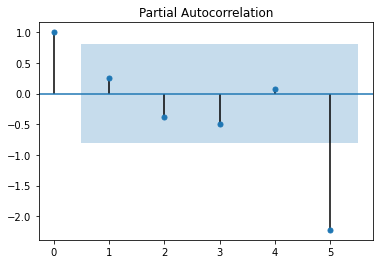

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


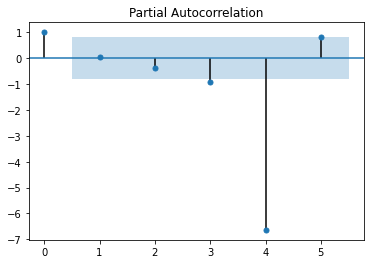

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


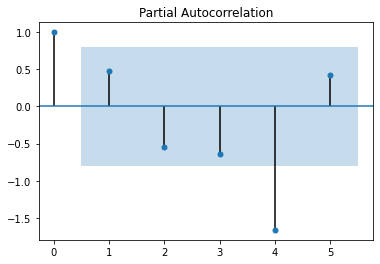

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


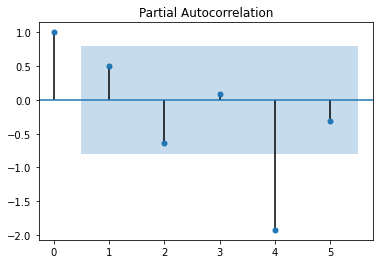

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


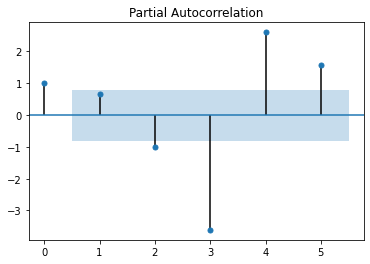

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


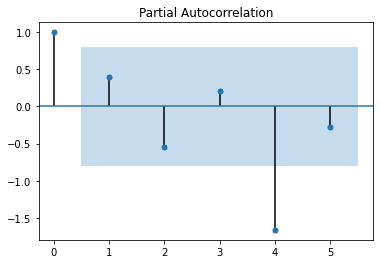

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


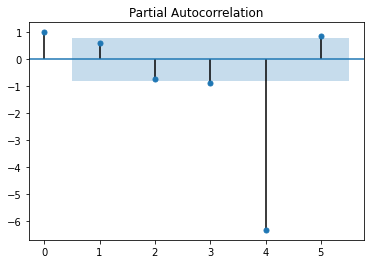

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


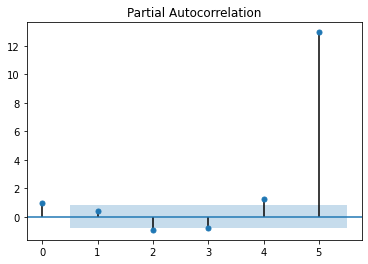

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


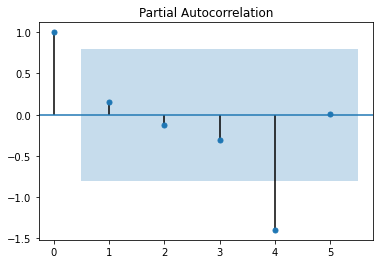

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


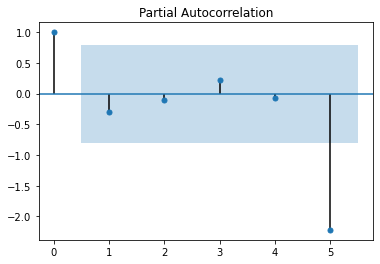

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


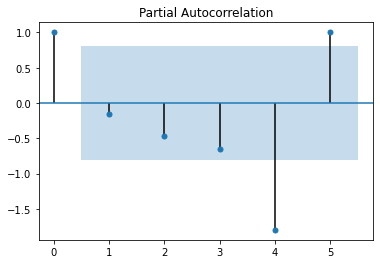

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


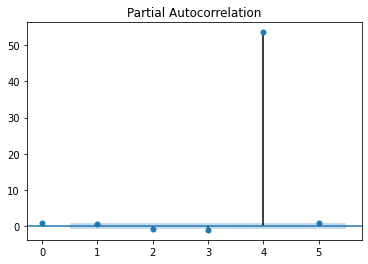

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


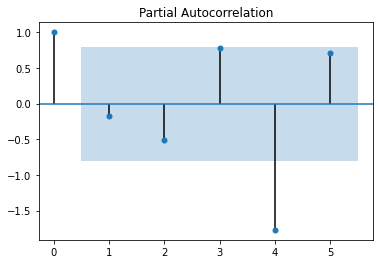

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


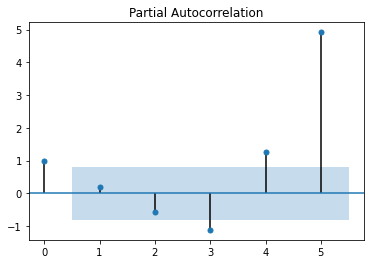

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


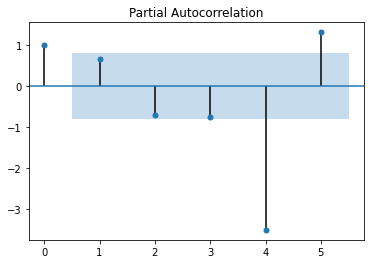

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


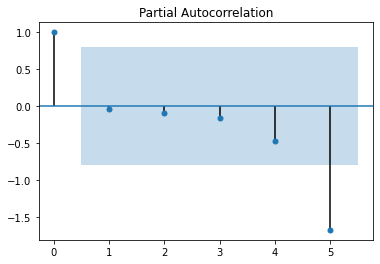

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


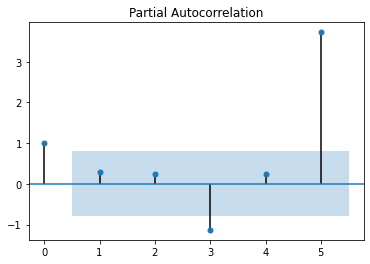

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


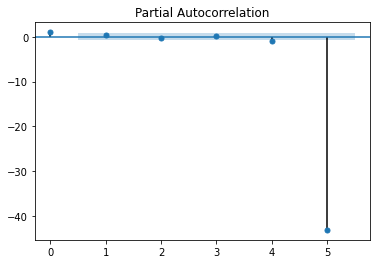

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


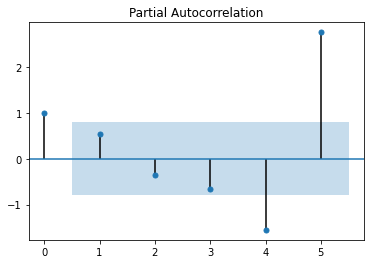

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


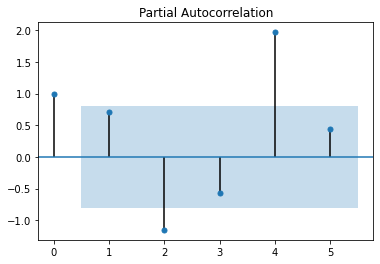

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


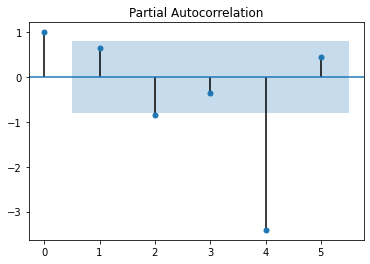

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


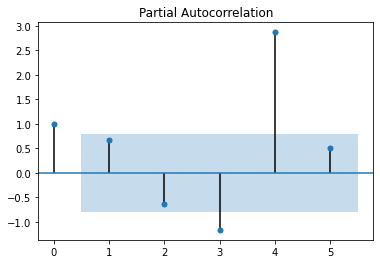

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


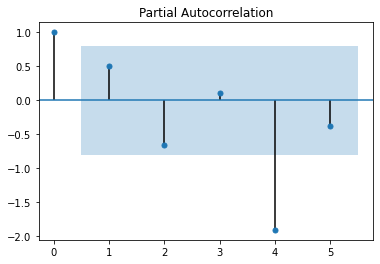

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


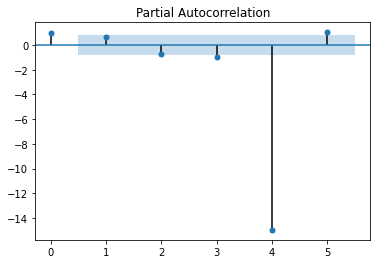

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


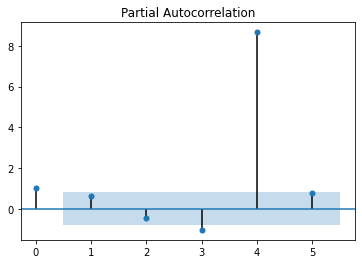

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


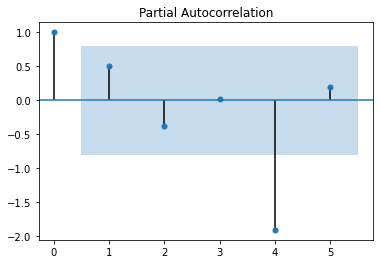

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


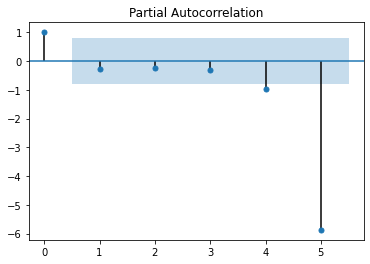

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


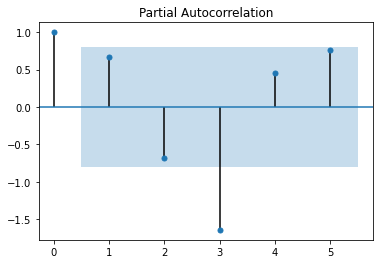

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


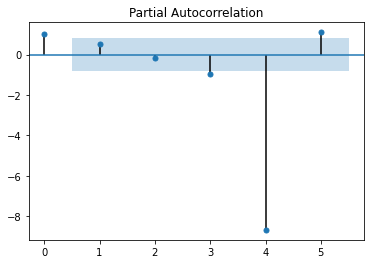

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


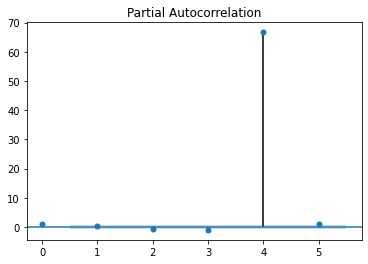

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


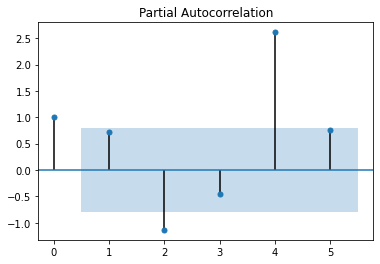

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


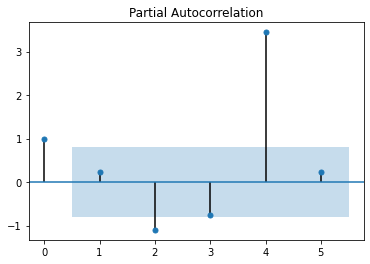

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


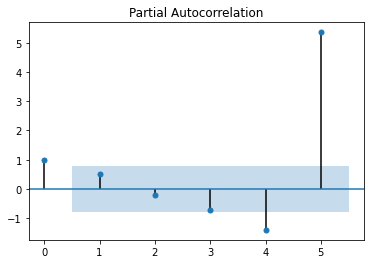

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


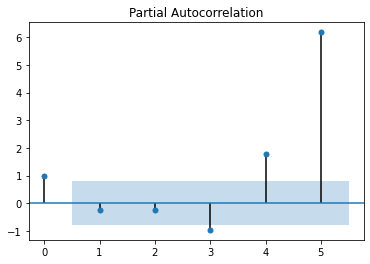

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


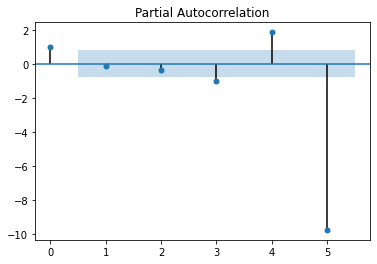

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


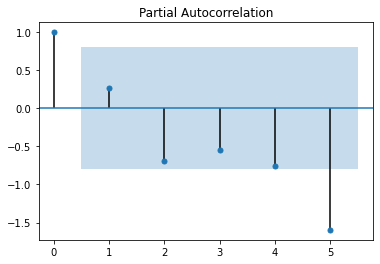

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


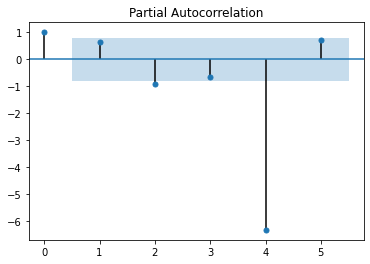

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


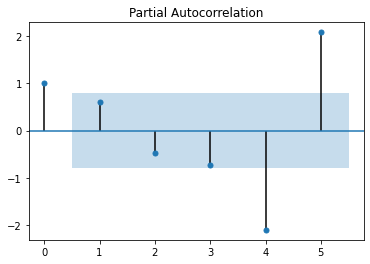

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


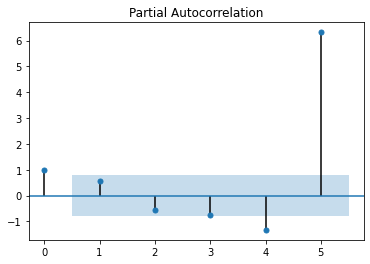

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


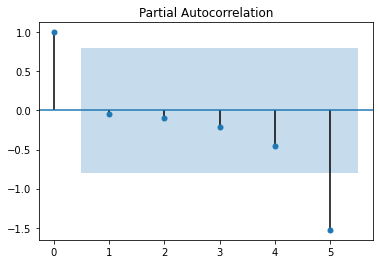

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


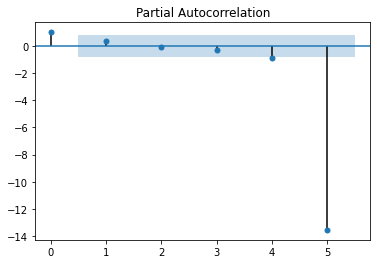

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


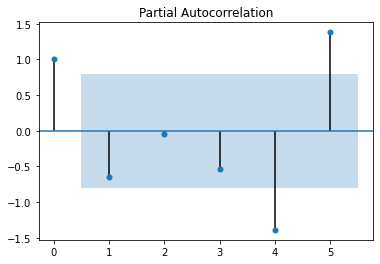

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


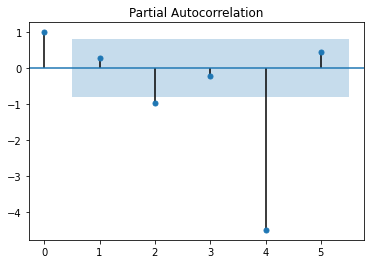

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


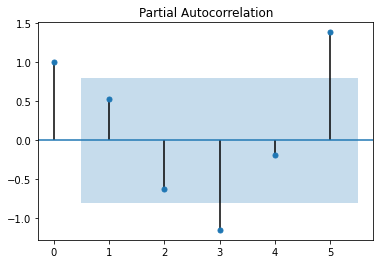

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


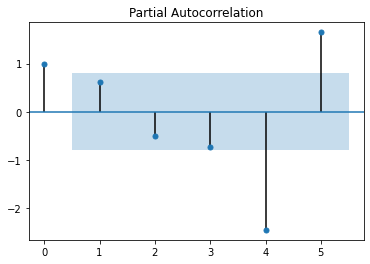

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


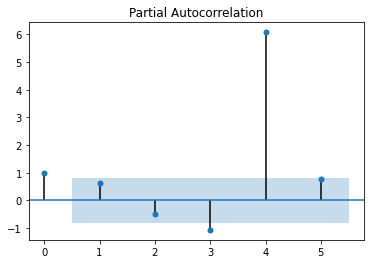

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


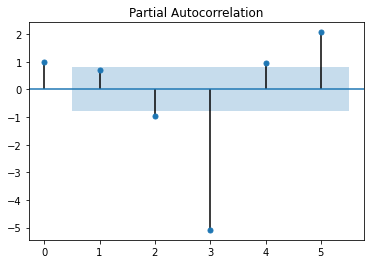

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


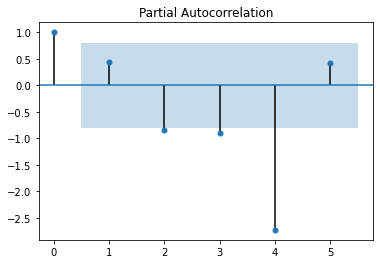

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


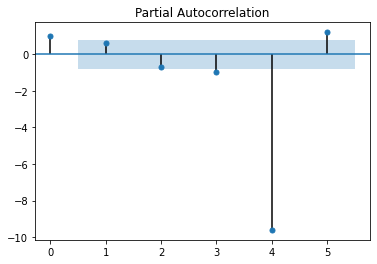

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


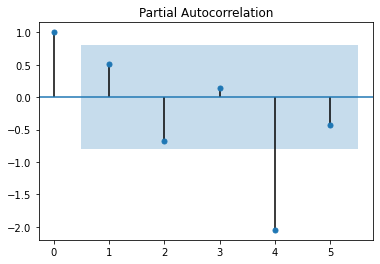

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


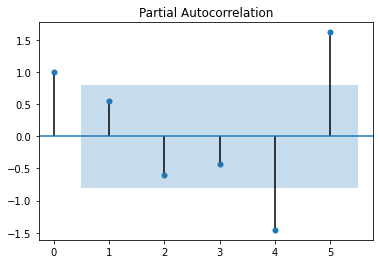

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


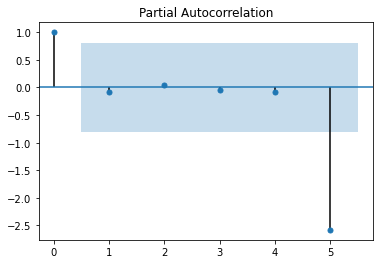

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


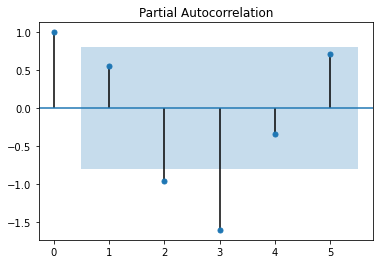

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


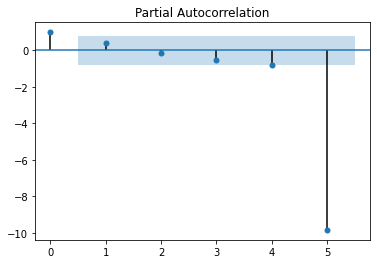

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


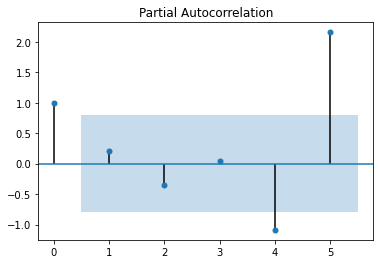

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


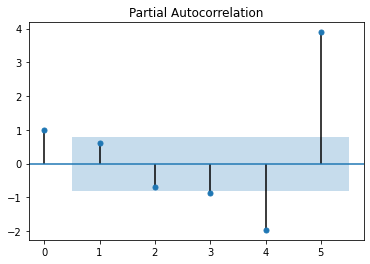

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


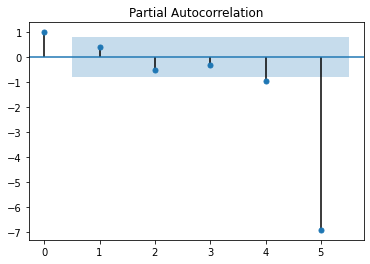

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


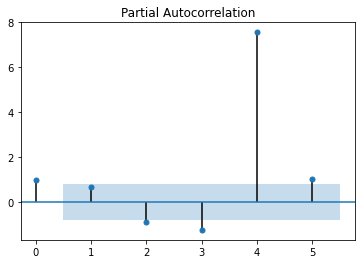

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


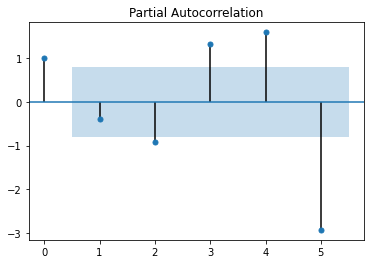

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


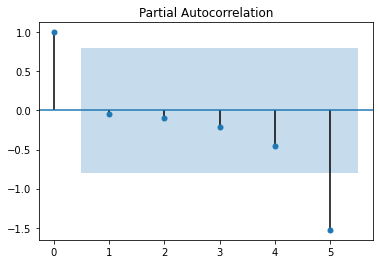

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


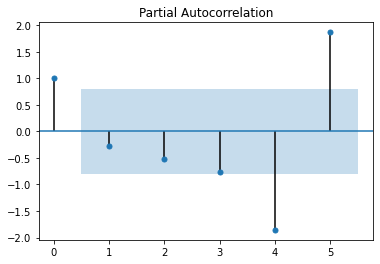

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


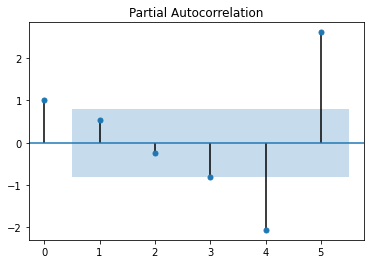

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


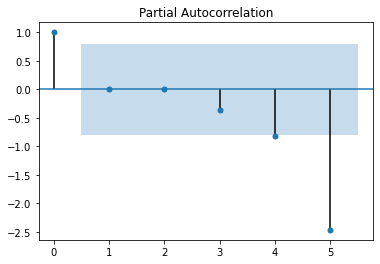

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


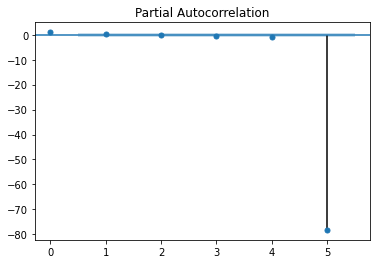

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


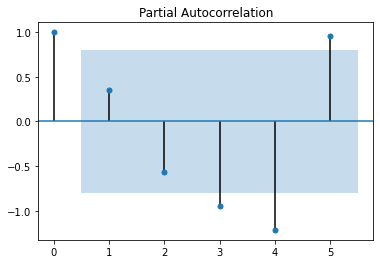

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


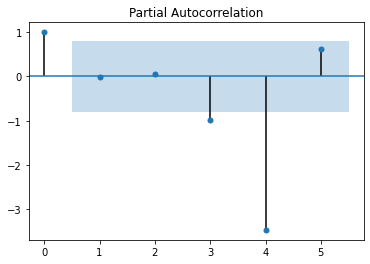

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


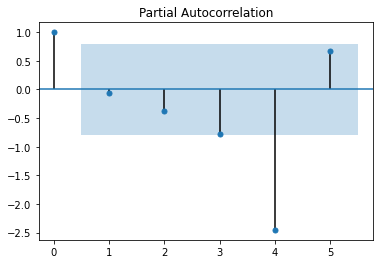

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


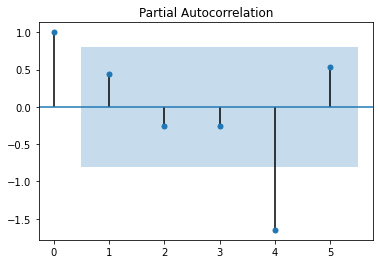

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


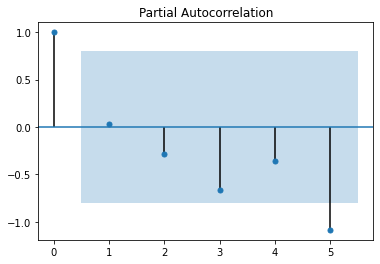

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


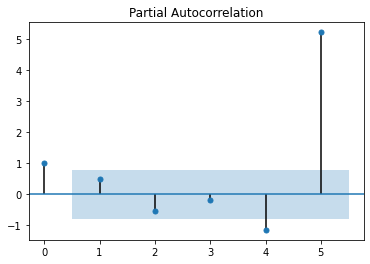

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


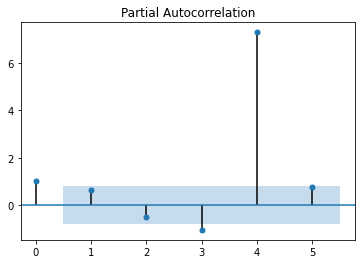

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


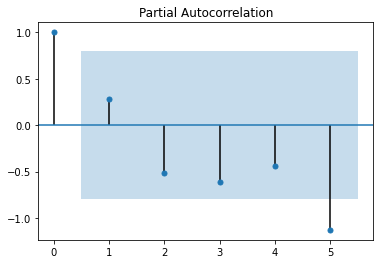

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


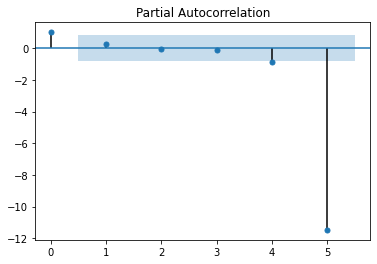

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


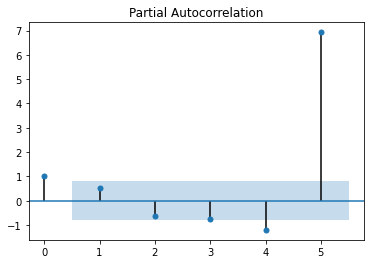

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


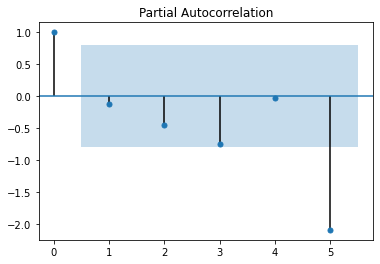

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


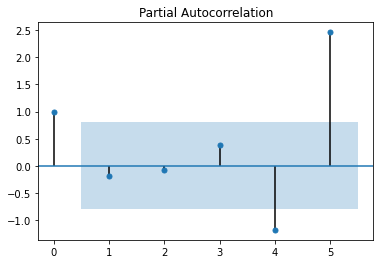

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


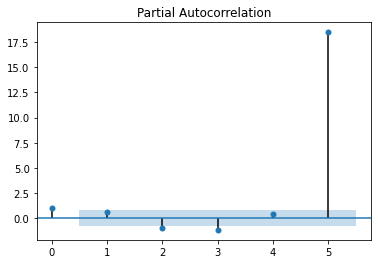

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


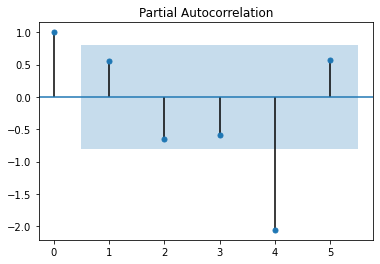

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


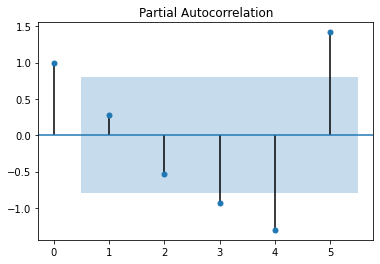

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


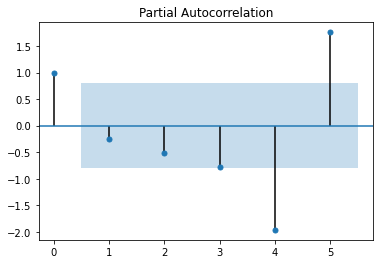

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


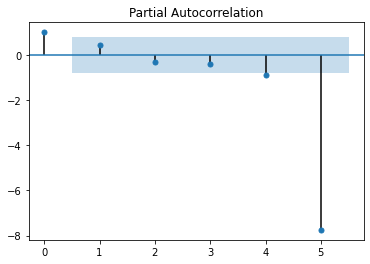

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


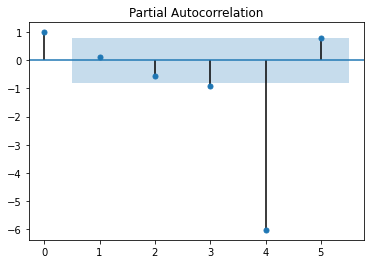

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


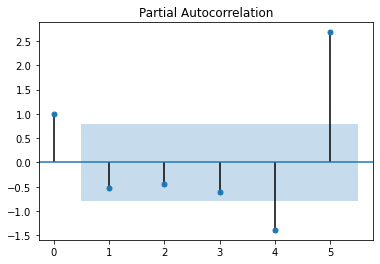

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


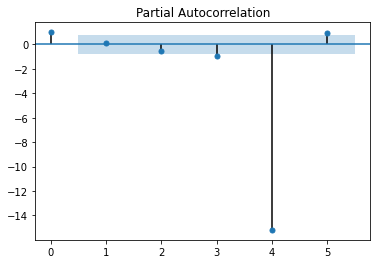

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


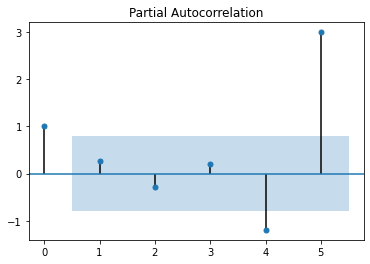

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


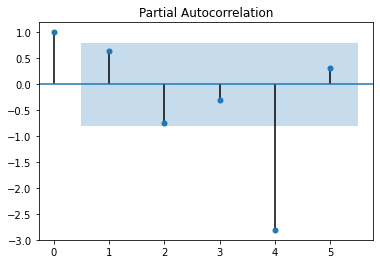

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


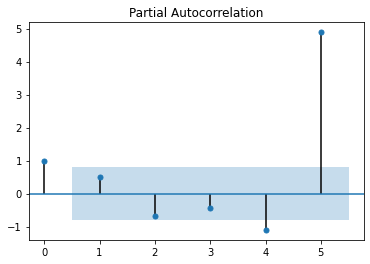

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


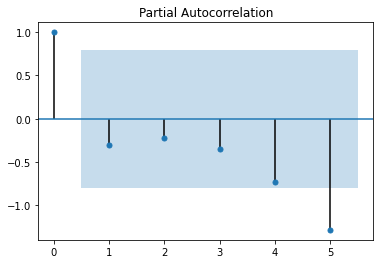

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


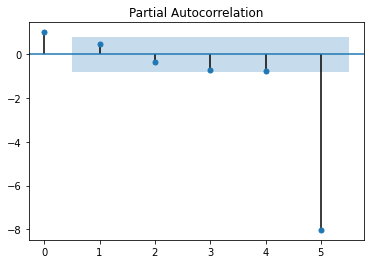

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


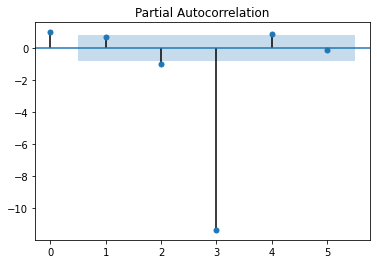

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


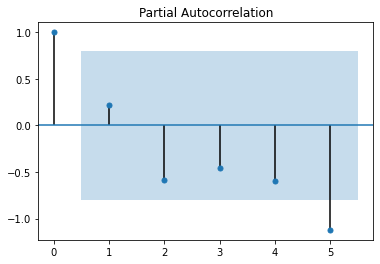

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


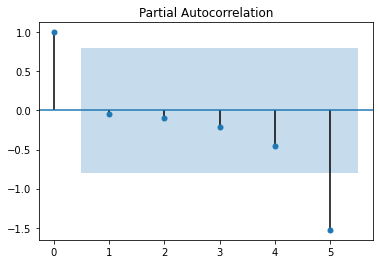

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


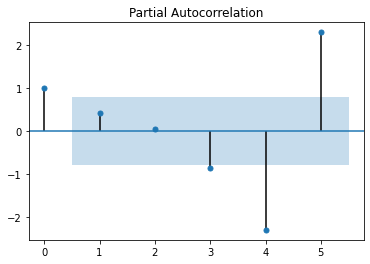

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


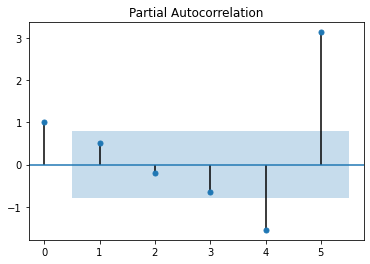

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


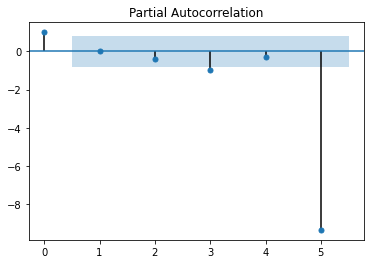

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


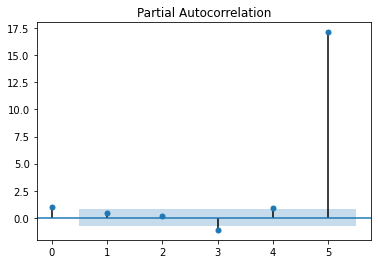

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


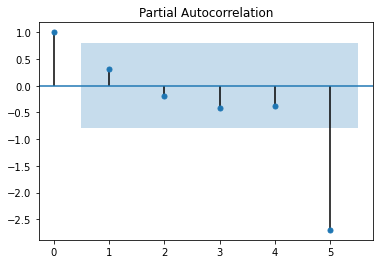

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


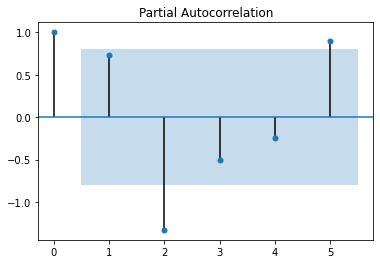

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


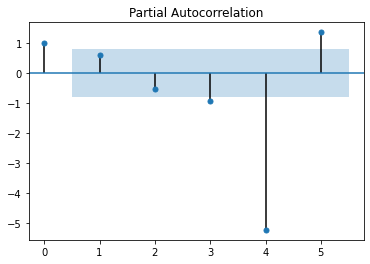

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


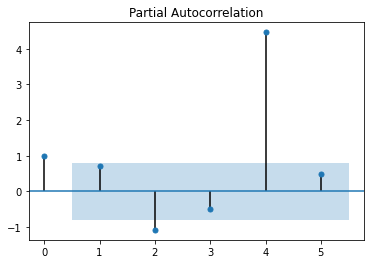

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


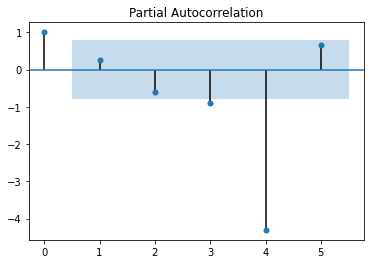

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


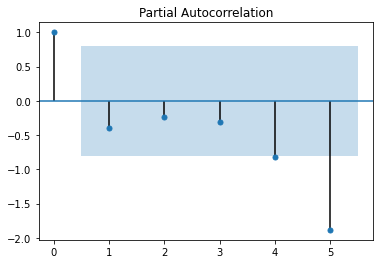

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


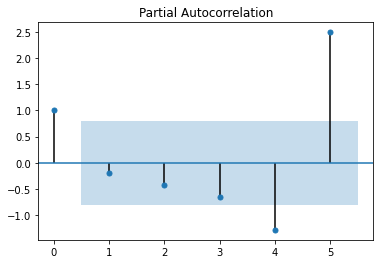

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


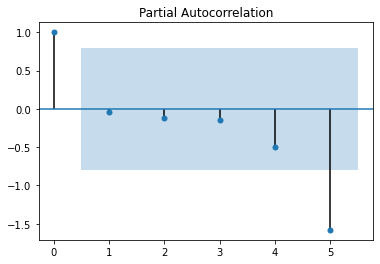

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


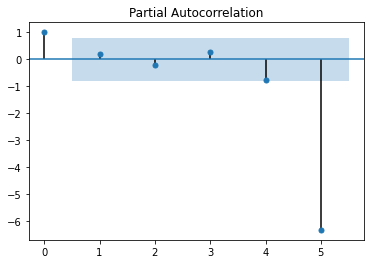

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


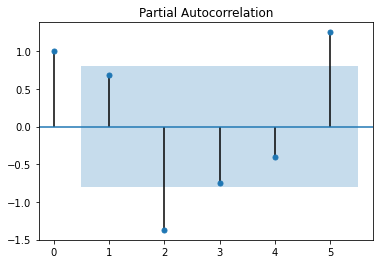

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


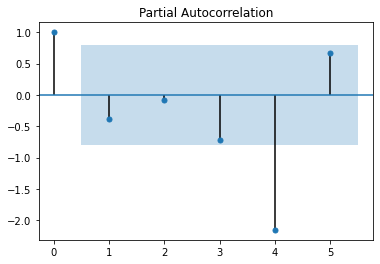

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


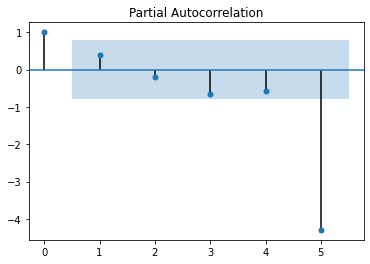

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


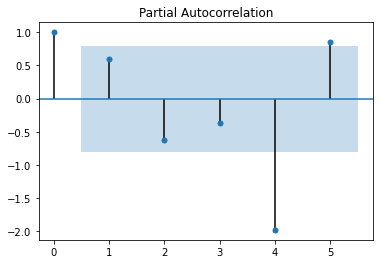

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


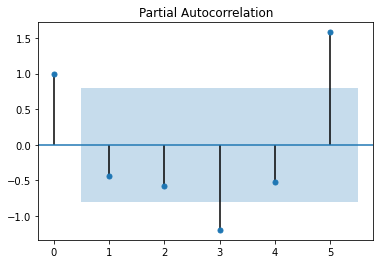

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


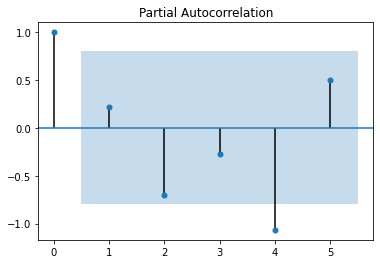

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


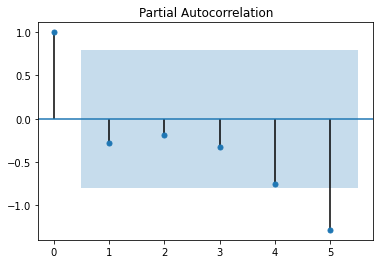

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


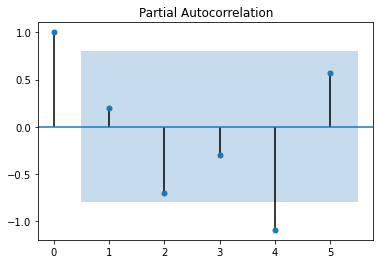

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


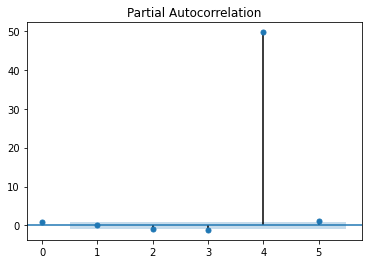

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


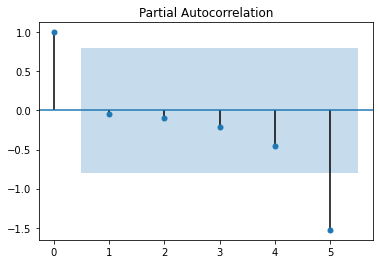

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


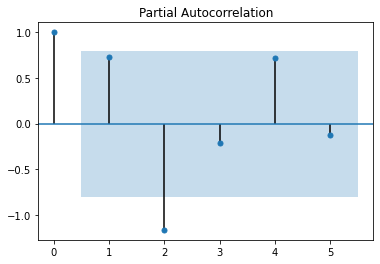

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


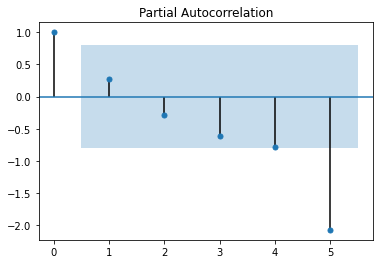

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


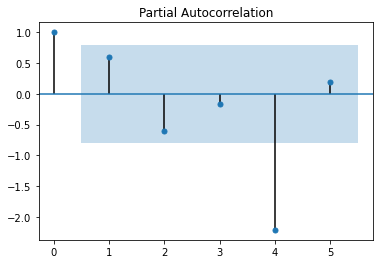

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


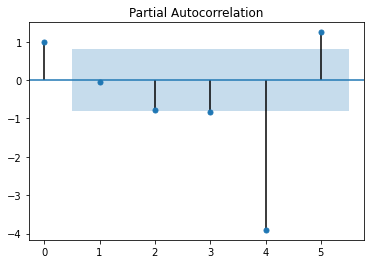

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


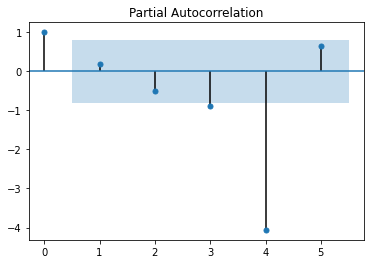

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


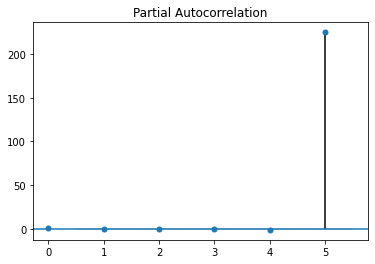

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


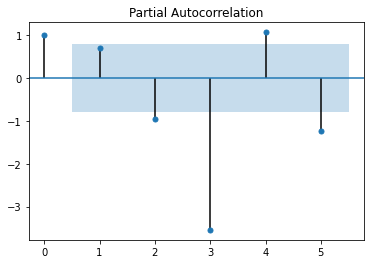

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


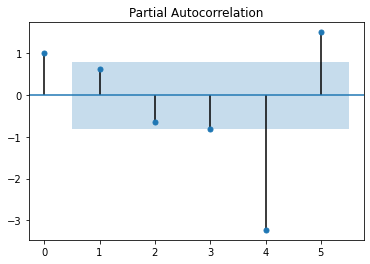

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


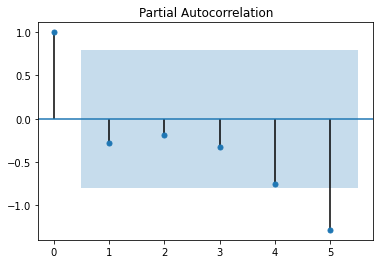

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


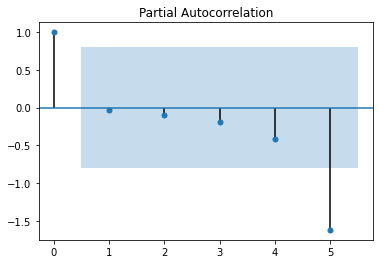

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


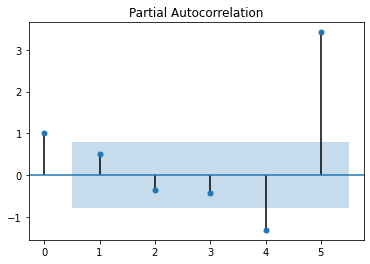

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


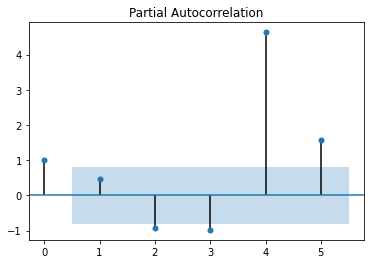

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


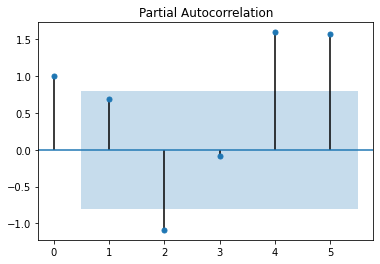

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


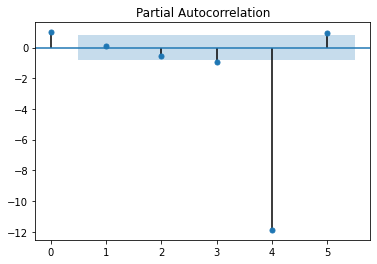

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


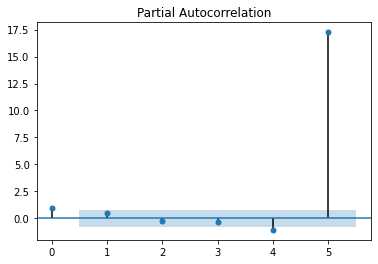

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


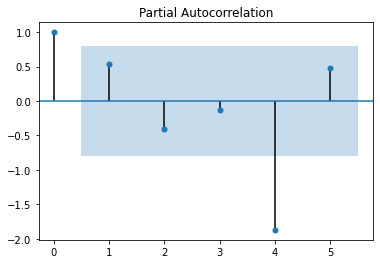

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


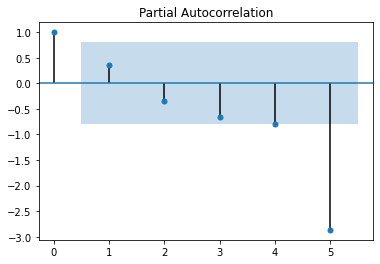

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


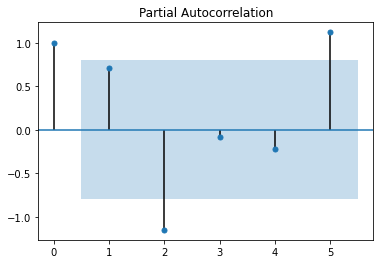

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


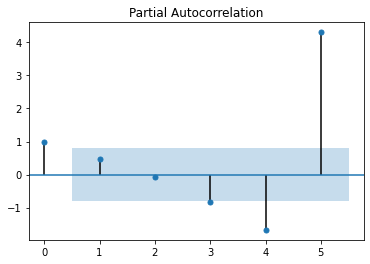

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


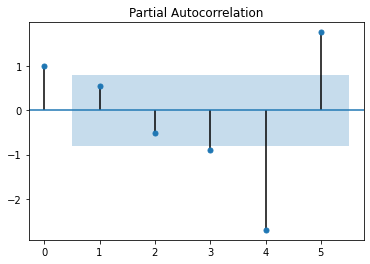

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


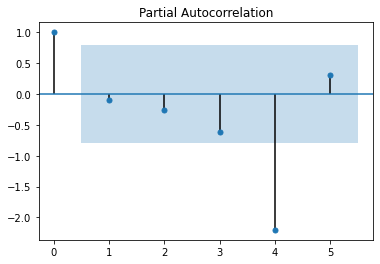

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


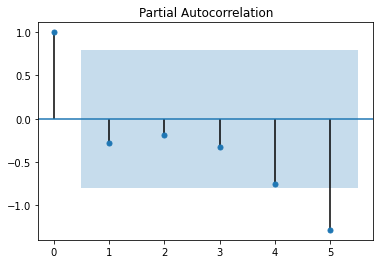

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


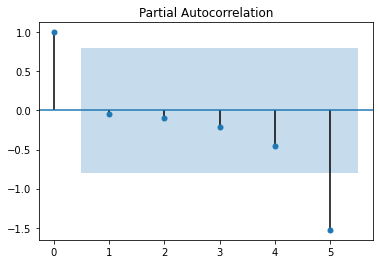

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


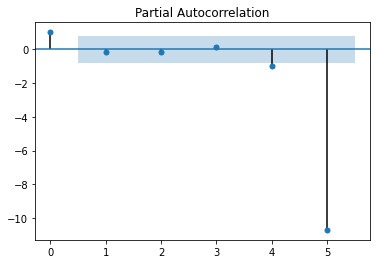

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


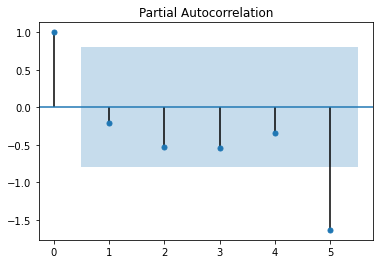

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


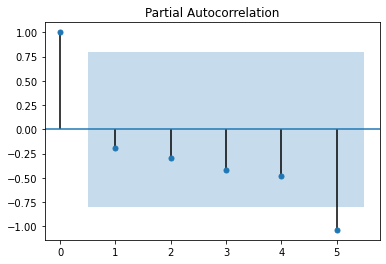

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


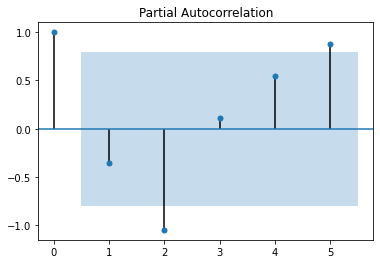

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


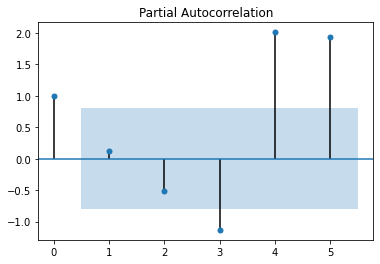

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


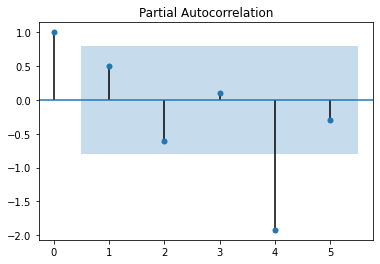

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


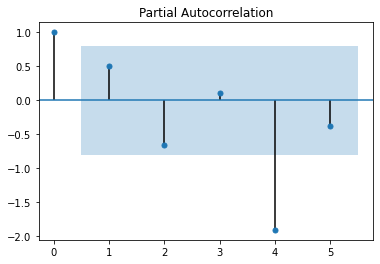

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


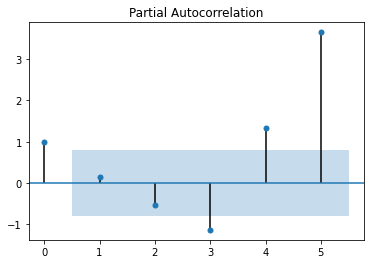

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


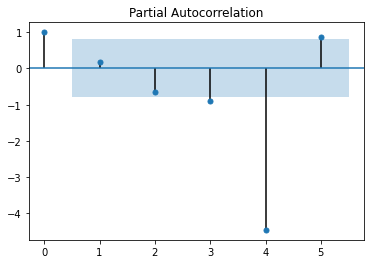

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


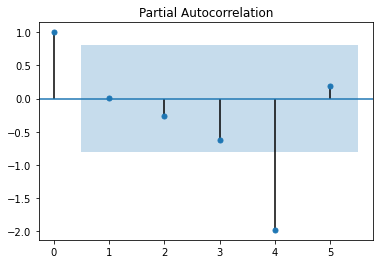

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


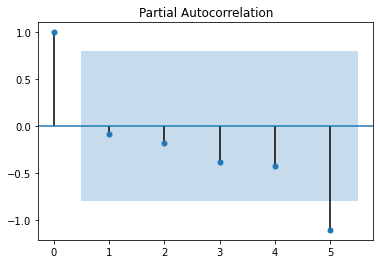

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


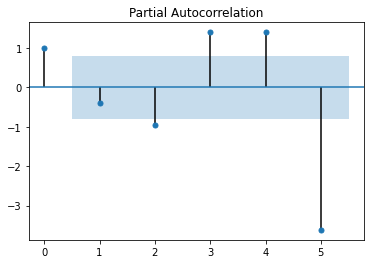

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


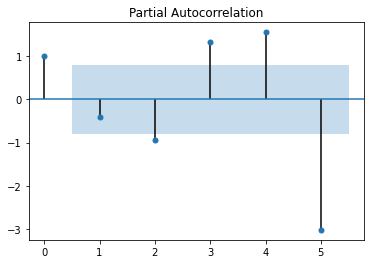

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


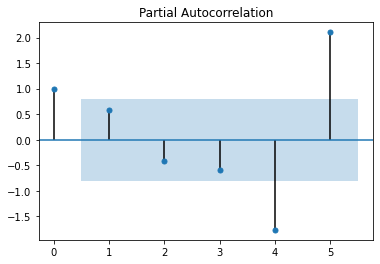

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


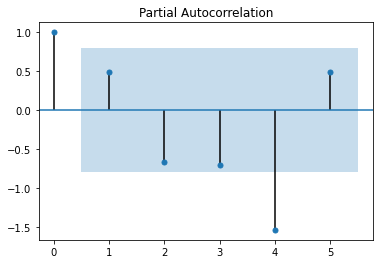

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


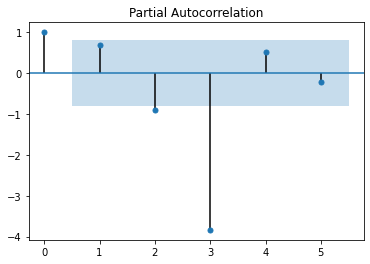

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


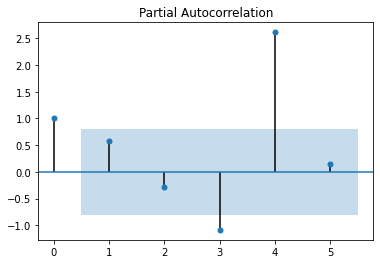

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


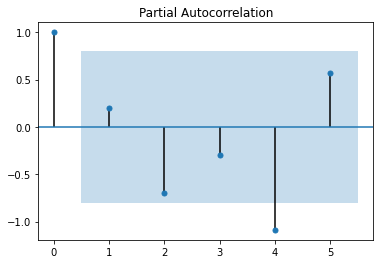

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


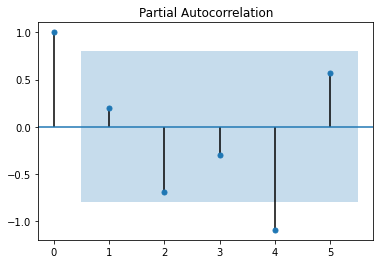

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


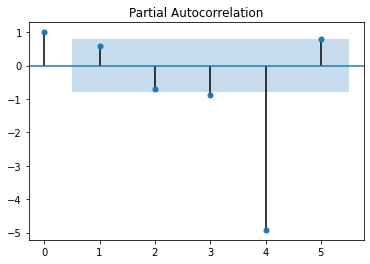

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


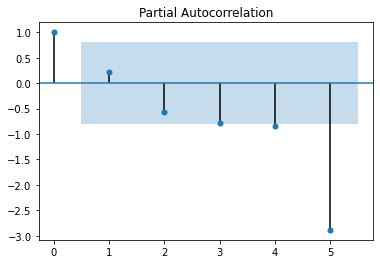

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


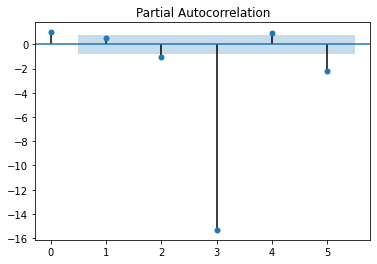

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


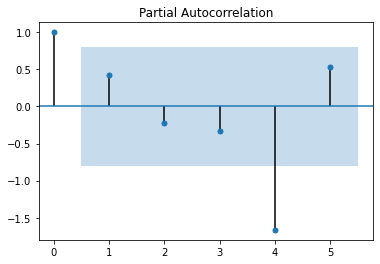

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


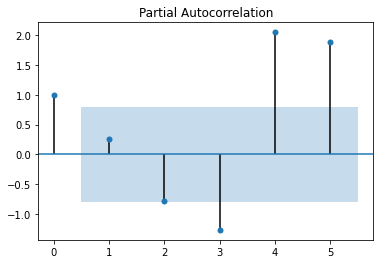

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


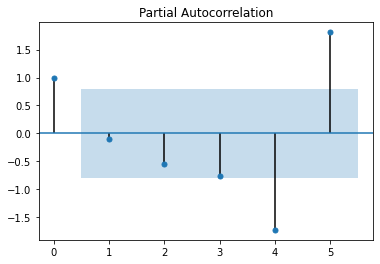

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


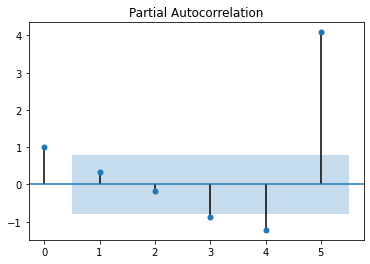

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


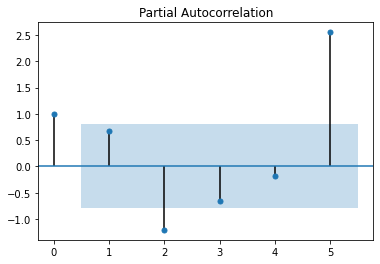

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


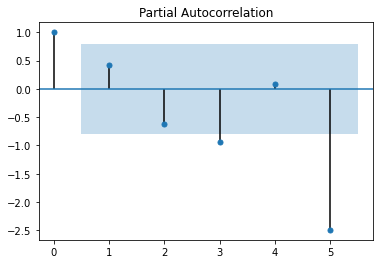

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


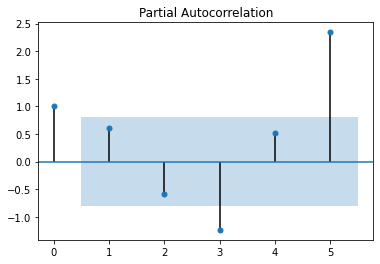

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


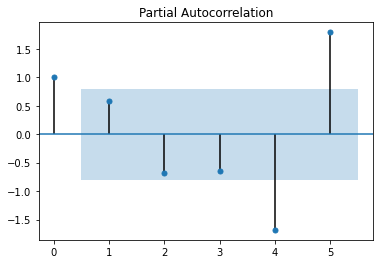

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


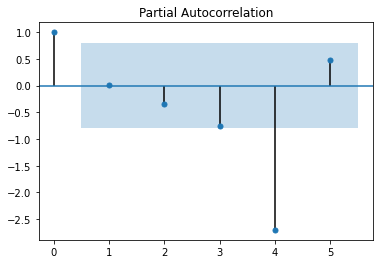

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


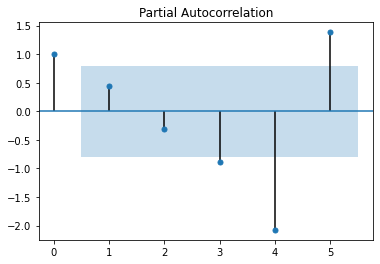

----------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


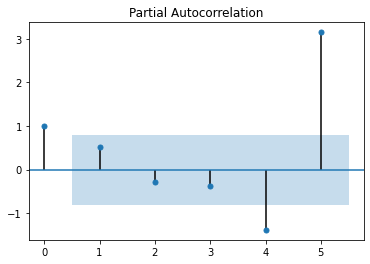

----------------------------------------------------------------------------------------------------------


In [ ]:
# Plotting PACF
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  if df['Country'][i] == current:
    current_dict[df['year'][i]] = df['Happiness Score'][i]
  else:
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}:
      l = pd.DataFrame(current_dict.values(),columns =['happiness scores'])
      plot_pacf(l['happiness scores'])
      pyplot.show()
    print("----------------------------------------------------------------------------------------------------------")
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

The results of PACF are not as conclusive as ACF. Some countries show very erratic behaviour. In fact, we do not see any clear winner in terms of the number of lags


However the general consensus seems to be that lag of p = 0 is appropriate
We will thus proceed with p = 0

Differencing factor d = 1 (anything more would be excessive)

q = 3 (Since we saw from Simple Moving Average that window of 3 years is most appropriate)

In [ ]:
# Applying the ARIMA model

# Running the following code gives the following error:
# ValueError: Insufficient degrees of freedom to estimate
# The ARIMA model needs atleast 30 samples, whereas we have only 5 for each country

# Hence we cannot use ARIMA model
# We have previously also established that a autoregressive model will not be appropriate
# Hence we stick to simple moving average and exponential smoothing


from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

'''
current = None
current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
for i in range(len(df)):
  #print(df.iloc[i,8],df.iloc[i,1],current)
  #if df.iloc[i,3] == current:
  if df['Country'][i] == current:
    #print(df.iloc[i,1])
    current_dict[df['year'][i]] = df['Happiness Score'][i]
  else:
     #plt.plot(list(current_dict.keys()), list(current_dict.values()), color='blue',label=current)
    if current and current_dict != {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}:
      x = list(current_dict.values())
      x.pop()
      l = pd.DataFrame(x,columns =['happiness scores'])
      print(l['happiness scores'])
      model = ARIMA(x, order=(0,1,3)) # ARIMA model
      model_fit = model.fit(disp=1)
      output = model_fit.forecast()
      yhat = output[0]
      obs = current_dict[2020]
      print('predicted=%f, expected=%f' % (yhat, obs))
      ape += abs(yhat-obs)/obs
      count = count + 1
    print("----------------------------------------------------------------------------------------------------------")
    current_dict = {2015:0,2016:0,2017:0,2018:0,2019:0,2020:0}
    current = df['Country'][i]
    current_dict[df['year'][i]] = df['Happiness Score'][i]

if df['Country'][i] == current:
      x = list(current_dict.values())
      x.pop()
      l = pd.DataFrame(current_dict.values(),columns =['happiness scores'])
      print(l['happiness scores'])
      model = ARIMA(x, order=(0,1,3))
      model_fit = model.fit(disp=1)
      output = model_fit.forecast()
      yhat = output[0]
      obs = current_dict[2020]
      print('predicted=%f, expected=%f' % (yhat, obs))
      ape += abs(yhat-obs)/obs
      count = count + 1

mape = ape/count
mape = mape*100
print("Mean Absolute Percentage Error: ",mape)
'''


----------------------------------------------------------------------------------------------------------
0    3.575
1    3.360
2    3.794
3    3.632
4    3.203
Name: happiness scores, dtype: float64


ValueError: ignored

The error here indicates that we do not have sufficient number of samples to perform ARIMA


A rule of thumb for ARIMA is atleast 30 samples



Hence we will stick to Exponential Smoothing as our main model